# **Used Cars Price Prediction**

## **Problem Definition**
To understand what factors effect the price of used cars and build machine learning models to predict the same

### **The Context:**

#### ***Why is this problem important to solve?***
 - The demand for used cars has increased in India in the recent past. COVID-19, has resulted in semiconductor chip shortages. This led automobile industries making pricier and more profitable cars rather than affordable new models. Also once placed an order, the duration to deliver the car has also increased due to tight supply of chips. COVID-19 has also resulted in high inflation, thus people struggling with high interest rates, seek relief in used car markets, thus increasing the demand. Also there has  been a recent shift in perspective, where car has become a necessity rather than a luxury. Before the emergence of COVID-19, in 2018-2019, when new car sales were recorded at 3.6 million, a 4 million sale was recorded for used cars.

- Infaltion, chip shortages, and change in perspective has resulted in emergence of used car industry where the availability of used cars compared to new cars  can be quick and affordable. Though initially used car had been affordable, these days we can see a surge in used car prices as well. The increased demand, has resulted in situation where supply cannot meet demands, thus used car becoming pricey.

- Since used cars, are sold through dealership, there is a large unceratinity in how prices are decided. From the perspective of seller alone, it is difficult to determine a price. The model, mileage, the year (higher demand or not, can supply meet the demand) and several other factors determine the worth of a car. Thus finding out hidden factors in the market, and determining a way to decide the price of used cars, thus making it more deterministic and reducing the uncertainity is important to grow in the market.

- Cars4u is a new tech company aimed at understanding the used car market. The company has to analyse what factors effect the used car price, thus make conclusion and give recommendations to make the used car price less unceratin and thus grow in the market.

###**The objective:**

#### ***What is the intended goal?***
-  To undestand and analyse important factors affecting the used cars price. Come up with a machine learning model which can predict used car price for a new data set. Give insights and recommendations based on the model, to improve the growth in market.

### **The key questions:**

#### ***What are the key questions that need to be answered?***
- What are the most important factors affecting the used car price?
- What are the factors that doesn't affect the used car price?
- How important is the affect of first, second or third owners in determining the price of used cars?
- Can we build a model such that, we can reduce the large uncretainity in determining the actual worth of a used car?
- Other than the available information from data, are there other external, factors affecting the used car price?


### **The problem formulation**:

#### ***What is it that we are trying to solve using data science?***
We are trying to build a machine learning models, like different type of regression models (linear, lasso or ridge), decision tree or random forest to understand the data.
We need to see which model can best reproduce the test data, and we can use the best model to determine the used car price with less uncertainity. To figure out the best model, we will use, concepts like hypothesis testing, residuals, mean squared error, etc. Using the model, we might be able to understand the foothole in the market and give recommendations.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [138]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries regression model
from sklearn.impute import KNNImputer
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
!pip install xgboost
# Importing XGBoost Regressor
from xgboost import XGBRegressor

#import librariries to encode categorical variables
from sklearn.preprocessing import LabelEncoder

#import library to tune the model
from sklearn.model_selection import GridSearchCV

#To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# import libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# import libraries to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Let us load the data**

In [139]:
# read the data
#Step 1: The data file is in google drive. To mount the drive on google colab
from google.colab import drive
drive.mount('/content/drive')
#Step 2 : Read appropriate csv file from the mounted drive
df = pd.read_csv('/content/drive/My Drive/Python/used_cars.csv')
#to copy the data, so that orginal data is not manipulated
data=df.copy()
# return the data frame stored in the label data_new. I will be using data_new from now on to perform the analysis.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [140]:
# To see the first 5 rows

print("The first 5 rows of the copied data is given below", "\n")
data.head(5)

The first 5 rows of the copied data is given below 



,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [141]:
# Use the shape functionality to get the number of rows and columns in a data frame
data.shape

(7253, 14)

In [142]:
# Use info() to print a concise summary of the DataFrame
data.info()
#general code to print the type and corresponding column name for any dataframe
#step1: To extract names of all existing datatype, unique functionality is used so that its not repeated
datatype=data.dtypes.unique()

#step2 To create an array corresponding to number of unique data types
i=list(range(0,len(datatype)))

#To append columns of unique data types in the order of array we use for loop
a=[] #datatype appended to a
for c in i:
  a.append(list(data.select_dtypes(datatype[c])))
  print("The columns in used car price data that corresponds to type",datatype[c],"is",a[c],"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB
The columns in used car price data that corresponds to type i

It is important to note that, there are some null values in the data, in the new_price, price, mileage, engline, power and seats.

In [143]:
#To see the percentage of null values
(data.isnull().sum()/data.shape[0])*100


S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 2.412795
Seats                 0.730732
New_price            86.129877
Price                17.013650
dtype: float64

The null values for mileage, engine, seat and power are less than 3 percent. In this case we might be able to drop these null values and still get performance for regression model. But we will decide this after bivariate analysis. There are 86% missing values in the new_price and 17% in the price. Either we will have to remove the whole column of new price or figure out a way to impute them after univariate and bivariate analysis. Price is our target variable and rest of the features are independent variable.

Imputing the null values in the target variable can be risky, as its the dependent variable and we do  not know how exactly the dependence is at this point, and this is what we need to determine. Imputing the target variable can introduce bias and potentially lead to inaccurate results. Thus removing the rows with missing values in the target variable, we can ensure that the remaining data is reliable and complete. This can lead to more accurate modeling and analysis results.

In [144]:
#To remove the rows with null in target variables
data_new=data.copy()
data_new = data_new.dropna(subset=['Price'])
print(data_new.shape)
(data_new.isnull().sum()/data.shape[0])*100



(6019, 14)


S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.496346
Power                 1.971598
Seats                 0.579071
New_price            71.625534
Price                 0.000000
dtype: float64

We can see the null values for mileage, engine, seat and power are less than 2 percent. There are 71% missing value in new_price. After performing bivariate and univariate analysis we will figure out how to impute these null values.


In [145]:
#To see for duplicated values
print("The sum of duplicated rows are",data_new.duplicated().sum())

The sum of duplicated rows are 0


In [146]:
#To see other factors of row, in which mileage is null
data_new[pd.isnull(data_new["Mileage"])]


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75


In [147]:
#To see the data for fuel_type electric
data_new[data_new["Fuel_Type"]=="Electric"]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75


There are only two data for electric cars, and these do not have mileage values. In electric cars, efficiency is calculated different from traditional internal combustion energy vechiles. It is calculated in terms of kilowatt per hours. Since both NaN values are for the same fuel type, and since there are only two values of them, removing them will not affect the model. We are removing the whole electric car category, which doesn't have enough data points, to predict if this fuel type has a great influence on the used car price. The price is not the maximum for electric car, neither the lowest. It is closer to the mean.

May be its okay to remove the mileage rows, but before that we will confirm if its okay to remove the category electric cars.

In [148]:
#To see other factors of row, in which seat is null
data_new[pd.isnull(data_new["Seats"])]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,3.60
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88
1917,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,1.70


It is interesting to note that, for null seat values, most of the corresponding power and engine values are missing. Based on univariate and bivariate analysis we can see if we can impute these values.

We can remove S.No columns as it is not a necessary information for regression model for used car prices.

In [149]:
#To remove S.no column
data_new = data_new.drop(columns=['S.No.'])
data_new

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [150]:
#To get the average, minimum and maximum of all suitable columns
display(data_new.describe().T)

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.0000,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0000,53000.00,73000.00,6500000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.1700,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.0000,1493.00,1984.00,5998.00
Power,5876.0,113.253050,53.874957,34.20,75.0000,97.70,138.10,560.00
Seats,5977.0,5.279572,0.805960,2.00,5.0000,5.00,5.00,10.00
New_price,824.0,23.075655,26.182412,3.91,7.9775,11.67,26.56,230.00
Price,6019.0,9.479468,11.187917,0.44,3.5000,5.64,9.95,160.00


The standard deviation of Kilometers driven is much higher than the mean and median value. The max value is 6500000 km, which gives an indication that kilometers driven are right skewed; there are outliers. We will have to log transform this column. But before log transforming the maximum kilometer values is much higher than third quartile value + 1.5 times the interquartile range, which is 131500. The maximum kilometer is 2 orders of maginitude greater than third quartile value.

Year is important, as older released cars can have lower prices compared to newer ones. The oldest car was manufactured in the year 1998, and the latest car in 2019. The average manufacturing year and median are close to 2013 and 2014. The mileage of the car ranges from 0 to 33.54, which means there are cars at dealerships that have never been driven. Seats can be considered as either numerical or categorical variables depending on the purpose. Here we will decide if to treat it as a categorical or numerical variable based on our results from univariate and bivariate analysis. The majority of cars have 5 seats.

The highest priced car is 160 lakh rupees and the lowest price is 44000 rupees. As expected, the maximum and minimum new price is less than the maximum and minimum of used car prices. The price is right skewed. The max is higher than the third quartile value + 1.5 times the interquartile range.

The mean and median of power give an indication of slightly right skewed data.

Lets see the which cars have mileage zero



In [151]:
print("% of data with mileage zero is",round(100*(len(data_new[data_new["Mileage"]==0])/len(data_new)),2),'%')
data_new[data_new["Mileage"]==0]

% of data with mileage zero is 1.13 %


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,NaN,8.0,NaN,2.20
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.00
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,NaN,1.70
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,NaN,1.39


The zero mileage is unrealisitic as all these cars have kilomters driven values and the minimum kilometers driven is 171 km. Lets see if there is mileage value for the least driven car

In [152]:
data_new[data_new["Kilometers_Driven"]==data_new["Kilometers_Driven"].min()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.7,796.0,47.3,5.0,NaN,3.6


This has Mileage value. Mileage is calculated based on kilometers driven / amount of fuel consumed. Since we don't have amount of fuel consumed data, to make the data realistic we have to remove the rows with mileage zero, which is only 1.13% of the data.

Lets see data corresponding to maximum kilometer

In [153]:
#To see kilometers driven which is a possible error
data_new[data_new["Kilometers_Driven"]==data_new["Kilometers_Driven"].max()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0


6.5 million kilometers are unrealistic for a car. This affect the reliability of the data. We should remove this unreasonable data point

In [154]:
#To get unique values for column seat
data_new["Seats"].value_counts(1)

5.0     0.839050
7.0     0.112766
8.0     0.022419
4.0     0.016563
6.0     0.005187
2.0     0.002677
10.0    0.000837
9.0     0.000502
Name: Seats, dtype: float64

83% of used cars have seats 5. By considering seats as a categorical variables, may be we can impute the missing seat value as 5. But to confirm this we need to see compare the price distribution for 5 seater vehicle and missing seat number vehicles.

In [155]:
#To get unique values for column Fuel Type
data_new["Fuel_Type"].value_counts(1)

Diesel      0.532480
Petrol      0.456222
CNG         0.009304
LPG         0.001661
Electric    0.000332
Name: Fuel_Type, dtype: float64

53% and 45% of vehicles are of fuel types diesel and petrol, only 1.13% of cars have other fuel types. Electric cars, from previous analysis, there are only two of them. Removing them should not much affect the target price prediction. 98% of the data is influenced by petrol and diesel type cars. There are enough data points for these fuel types.

Removing the electric car category might not be an issue, as there are not enough data points to make interpretation for that category. Even if we see any trend for those two data points compared to petrol and diesel, we cannot eliminate the fact that it can come from an error. Hence it is always better to have enough data points for all categories. But in general, the number of cars in the electric category is less.

In [156]:
#To get unique values for column Transmission
data_new["Transmission"].value_counts(1)

Manual       0.714238
Automatic    0.285762
Name: Transmission, dtype: float64

71% of cars are manual and 28% automatic. It is important to keep both these sets as there are significant data points in both

In [157]:
#To get unique values for column Owner Type
data_new["Owner_Type"].value_counts(1)

First             0.818907
Second            0.160824
Third             0.018774
Fourth & Above    0.001495
Name: Owner_Type, dtype: float64

81% of owners are first owners. This means the car didn't have a previous owner.

16% owners are second, which means the car has a previous first owner.

Less than 3% of people are third owner and more.

Most of the people prefer to have first owner type vehicles. First owner cars are often assumed to be in better condition and better manintained. We can check how the power, mileage and kilometers driven vary with owner type.

In [158]:
#To get unique values for column Location
data_new["Location"].value_counts(1)

Mumbai        0.131251
Hyderabad     0.123276
Kochi         0.108158
Coimbatore    0.105665
Pune          0.103339
Delhi         0.092042
Kolkata       0.088885
Chennai       0.082073
Jaipur        0.068616
Bangalore     0.059478
Ahmedabad     0.037215
Name: Location, dtype: float64

8 percent and more car are located in Chennai, Kolkata, Delhi, Pune, Kochi, Coimbatore, Hyderabad and Mumbai.

All these locations except Jaipur, Bangalore, Ahmedabad and Chennai have similar shares of car availabilities. We need not expect car price to be affected based on the locality. To conclude all locations have significant shares of car with minimum share being 3 percent and maximum 13 percent. 3 percent can be significant as the maximum share among the locations are 13 percent.

In [159]:
#Sometime car company can be important to buyers
#Lets make a categorical column of car company
data_new['Company'] = data_new['Name'].str.split().str[0]
data_new

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75,Maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00,Hyundai
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90,Mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65,Maruti


In [160]:
#To get unique values for column Company
data_new["Company"].value_counts(1)

Maruti           0.201196
Hyundai          0.183918
Honda            0.101013
Toyota           0.068284
Mercedes-Benz    0.052833
Volkswagen       0.052334
Ford             0.049842
Mahindra         0.045190
BMW              0.044360
Audi             0.039209
Tata             0.030902
Skoda            0.028742
Renault          0.024090
Chevrolet        0.020103
Nissan           0.015119
Land             0.009968
Jaguar           0.006646
Fiat             0.004652
Mitsubishi       0.004486
Mini             0.004320
Volvo            0.003489
Porsche          0.002991
Jeep             0.002492
Datsun           0.002160
Force            0.000498
ISUZU            0.000332
Smart            0.000166
Ambassador       0.000166
Isuzu            0.000166
Bentley          0.000166
Lamborghini      0.000166
Name: Company, dtype: float64

More used cars are from Maruti, Hyundai and Honda. The number of used cars for luxury companies like Lamborghini, Porsche, Mitsibushi etc have less number of used cars available. This is probably because most of the people who go for used car look for affordable prices. Maruti Suzuki, Hyundai, and Honda are generally considered to be more on the affordable and mass-market side of the automotive industry, rather than being classified as luxury car brands.

It would be interesting to see, how the price of used car vary according to this category.

Also Isuzu and IZUSU are the same company, it is taken as two different company, we will make it the same

In [161]:
#To categorize Isuzu and ISUZU under the same category
data_new['Company'] = data_new['Company'].str.replace('Isuzu', 'ISUZU')

In [162]:
#To get the unique values of category name
data_new["Name"].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64

Mahindra XUV500 W8 2WD is the most number of specifc used car model available. The second is Maruty Swift VDI and then Honda City 1.5 S MT. It is important to note that name does not influence the car price, it is the mileage, model year, fuel type, company, seats, power engine that affect the price. The car name is just a representation tag for a combination of features. Hence we can remove that column on analysis. If we keep car name as categorical variable, there are going to be many unique values, and hence many dummy categories, overcomplicating the model.


In [163]:
#Before EDA we will make the data set excluded of mileage zero values
data_new = data_new[data_new['Mileage'] != 0]
data_new[data_new['Mileage'] == 0].sum()

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
New_price            0.0
Price                0.0
Company              0.0
dtype: float64

Now there are no rows mileage zero

In [164]:
#To remove unrealistic kilometer value
data_new = data_new[data_new['Kilometers_Driven'] != data_new['Kilometers_Driven'].max()]
data_new[data_new['Kilometers_Driven']==data_new['Kilometers_Driven'].max()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Company
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3,1968.0,141.0,5.0,NaN,7.5,Skoda


kilometer of 7.7 lakh is still high for a passenger car manufactured at 2013.

But if this car was used as a taxi or delivery vehicle may be this is possible.

In [165]:
#To drop the column Name
data_new = data_new.drop(columns=['Name'])
data_new

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Company
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65,Maruti


## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

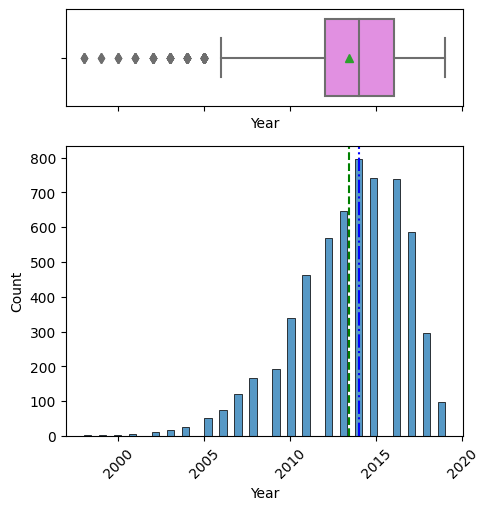

--------------------------------------------------------------------------------


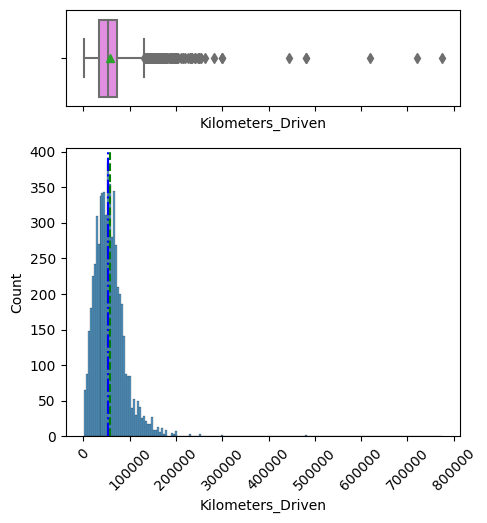

--------------------------------------------------------------------------------


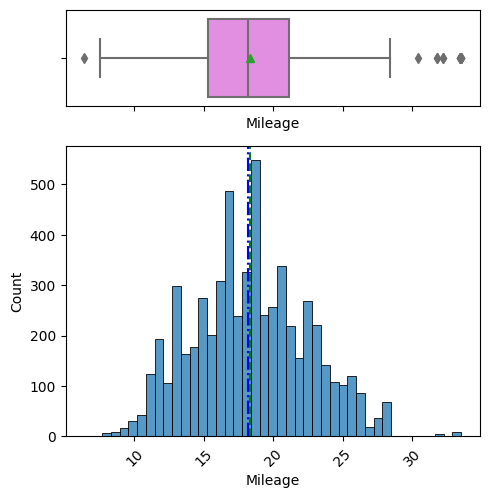

--------------------------------------------------------------------------------


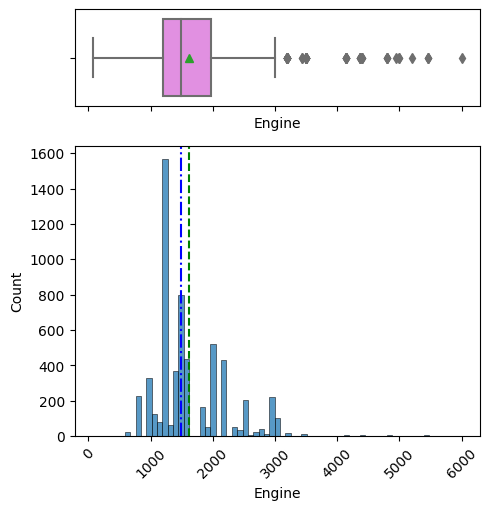

--------------------------------------------------------------------------------


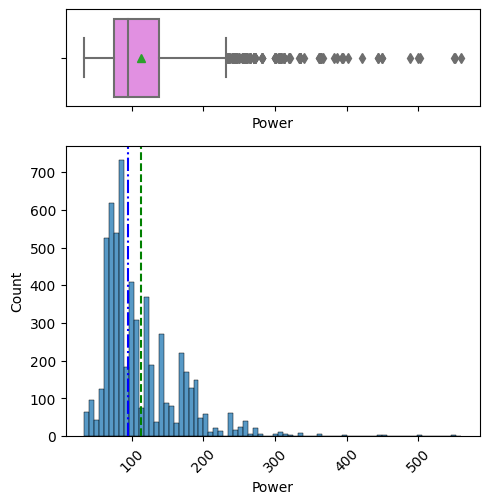

--------------------------------------------------------------------------------


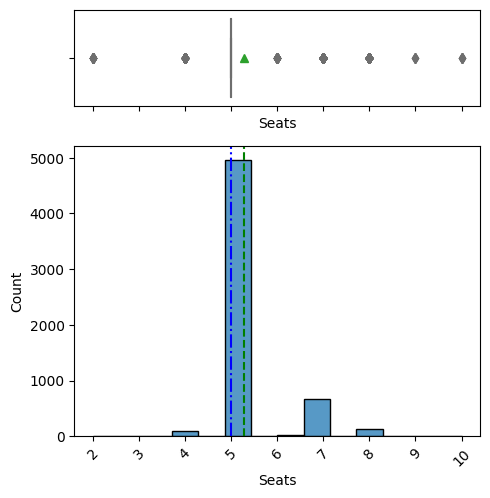

--------------------------------------------------------------------------------


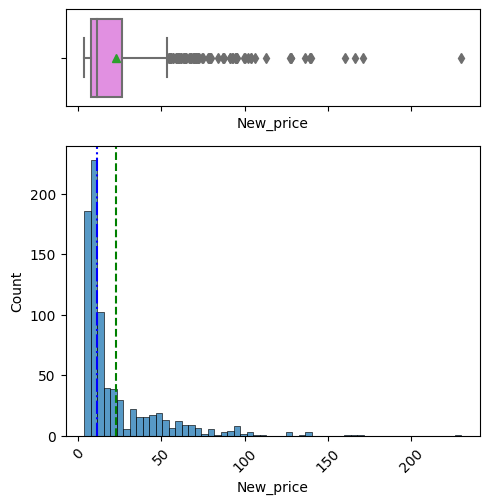

--------------------------------------------------------------------------------


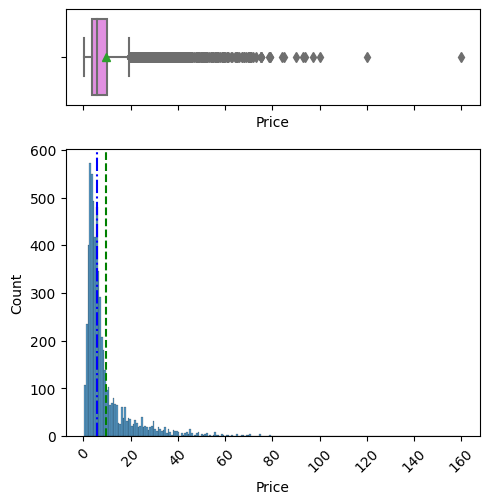

--------------------------------------------------------------------------------


In [166]:
#Reference for hist_box_fun : Fanatsy Sports practice case study
#Here I am defining a function to plot histogram and box plot for numercal variable together
def hist_box_fun(data_new,feature,kde=False):
 fig, ax=plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios':(1,3)},figsize=(5,5))
 sns.boxplot(data=data_new,x=feature,showmeans=True,color='violet',ax=ax[0])
 sns.histplot(data=data_new,x=feature,kde=kde,ax=ax[1])
 ax[1].axvline(data_new[feature].mean(),linestyle='--',color='green')
 ax[1].axvline(data_new[feature].median(),linestyle='-.',color='blue')

column = ["Year","Kilometers_Driven","Mileage","Engine","Power","Seats","New_price","Price"]

for name in column:
    hist_box_fun(data_new, name)



    plt.tight_layout()     #To avoid overlap of ticklabels

    plt.xticks(rotation=45)
    plt.show()             # To display the plots
    print("--------------------------------------------------------------------------------")

It is important to note that price, new price, kilometers driven, are right skewed. It would be better to visualize these data after log transformation.
Also since there are many missing values is new_price we need to worry about them before using the log tranformed data.

Most number of cars have 5 seats. For visualization, it will be better to consider seat as a categorical variable.

For regression we will consider seat as a numerical variable, as the maginitude of seat can have an influence on the price.




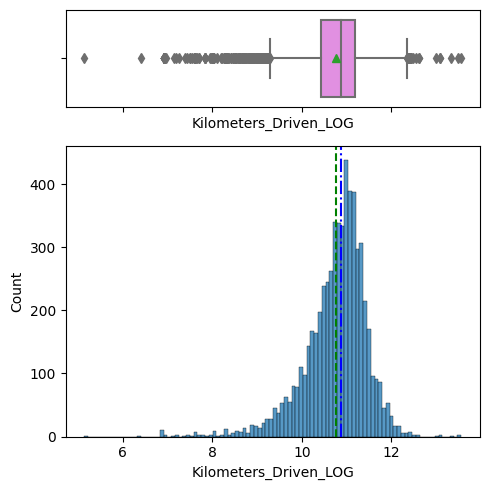

--------------------------------------------------------------------------------


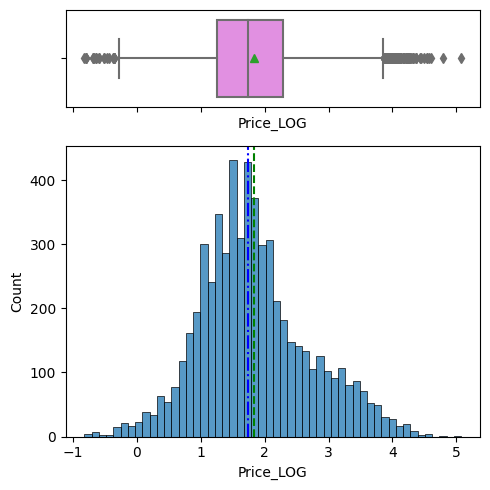

--------------------------------------------------------------------------------


In [167]:
#To log transform skewed data, that is Price and Kilometers driven
data_new_log=data_new.copy()    #To not modify the data_new
#Using np.log function for log transforming
data_new_log["Price_LOG"]=np.log(data_new_log['Price'])
data_new_log["Kilometers_Driven_LOG"]=np.log(data_new_log['Kilometers_Driven'])
column = ["Kilometers_Driven_LOG","Price_LOG"]

#To see histogram and boxplot after log transforming
for name in column:
    hist_box_fun(data_new_log, name)



    plt.tight_layout()     #To avoid overlap of ticklabels


    plt.show()             # To display the plots
    print("--------------------------------------------------------------------------------")

Now the price, and kilometers driven do not have the right skewness as before.
We can also try log transforming the power data and new_price, but again since we need to deal with some missing values, we will do this later.

Log transforming with missing values can be problematic. Log transforming and then removing missing values can result in bias

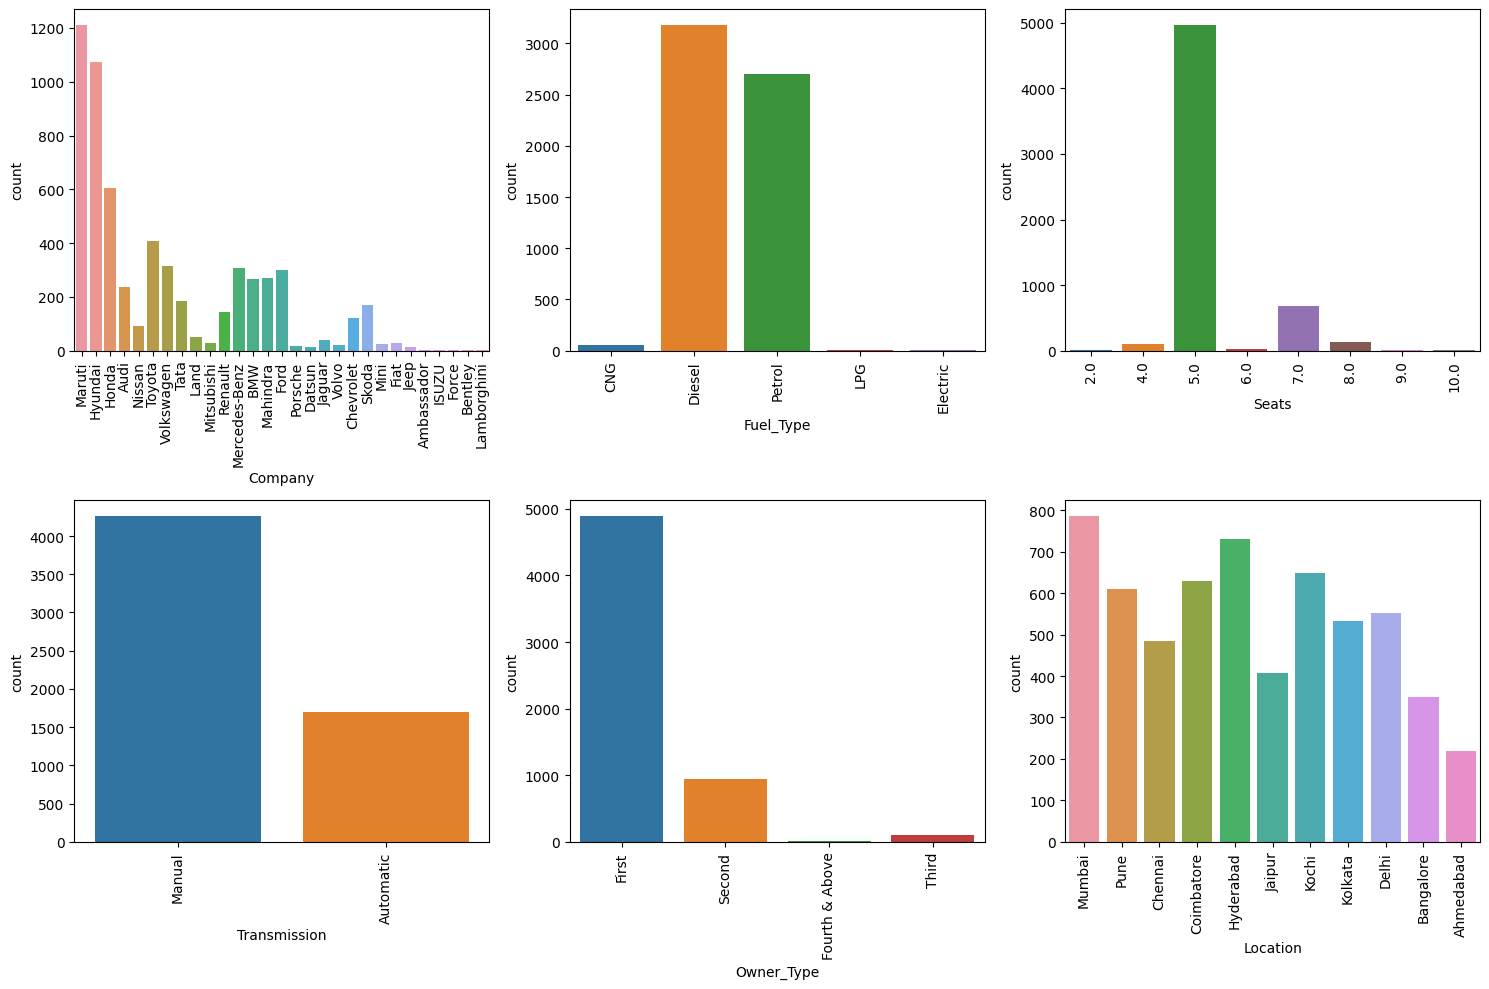

In [168]:
column1=["Company","Fuel_Type","Seats","Transmission","Owner_Type","Location"]
# To make subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))



for name, ax in zip(column1, axes.flatten()):  # zip to iterate over both name and the corresponding axis
    sns.countplot(data=data_new_log, x=name, ax=ax)
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better visibility

# Remove any empty subplot if the number of columns is less than 3
if len(column1) < 3:
    fig.delaxes(axes[1, len(column1):].flatten())

plt.tight_layout()

# Display the plots
plt.show()

As we saw from unique value analysis majority of the cars are manual, with fuel type diesel and petrol,  with first owners and seat number 5. Most car are of the make, maruti, hyundai and honda. This could be because, these companies have more supply in the country with service facilities available in all states. This can result more available cars for these companies. Most cars are in the location mumbai and hyderabad.

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

<Axes: >

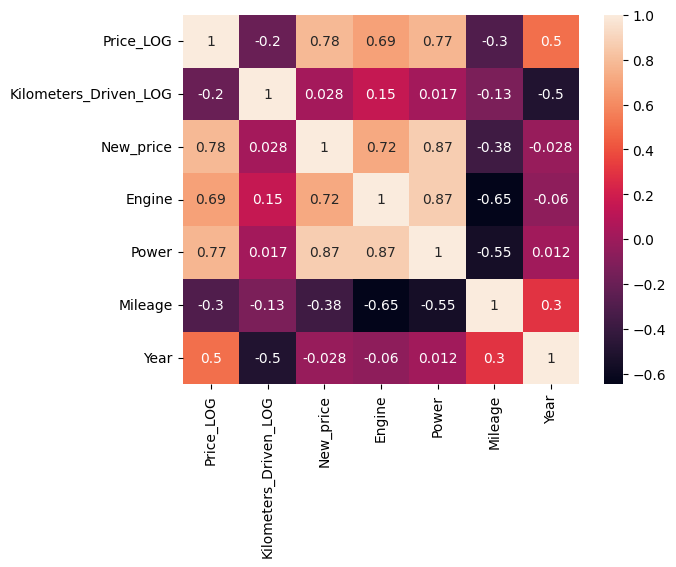

In [169]:
#To plot heat map with correlation values for numerical variables
sns.heatmap(data=data_new_log[['Price_LOG','Kilometers_Driven_LOG','New_price','Engine','Power','Mileage','Year']].corr(),annot=True)

Price_log seems to have a strong positive correlation with New_price, Engine, and Power, and a negative correlation with Year. This means older cars tend to have lower prices. With an increase in power and engine, the price increases as expected.

We need to be a little skeptical about the correlation between the price of new cars and used cars, as there is 74% missing data. We need to determine for which year the new car price is available. For relatively recent manufacturing years, we can expect the used car price not to be much less than the new car price. However, as the time period increases, we cannot reliably establish a connection between the new car price and used car price. For example, a car manufactured in 1998 may not have a demand for a new model of the same year, and therefore, the new car price might not be available. Due to low demand, we observe that the number of used cars below 2009 is very low. Even if we were to obtain access to the new car price for 1998, it would not have any influence on the used car price now, as the currency value has changed, conditions in 1998 and 2019 have changed. As a result, there would not be any correlation between the new car price and used car price in that case. To further clarify this, let's investigate for which years the new car price is available.

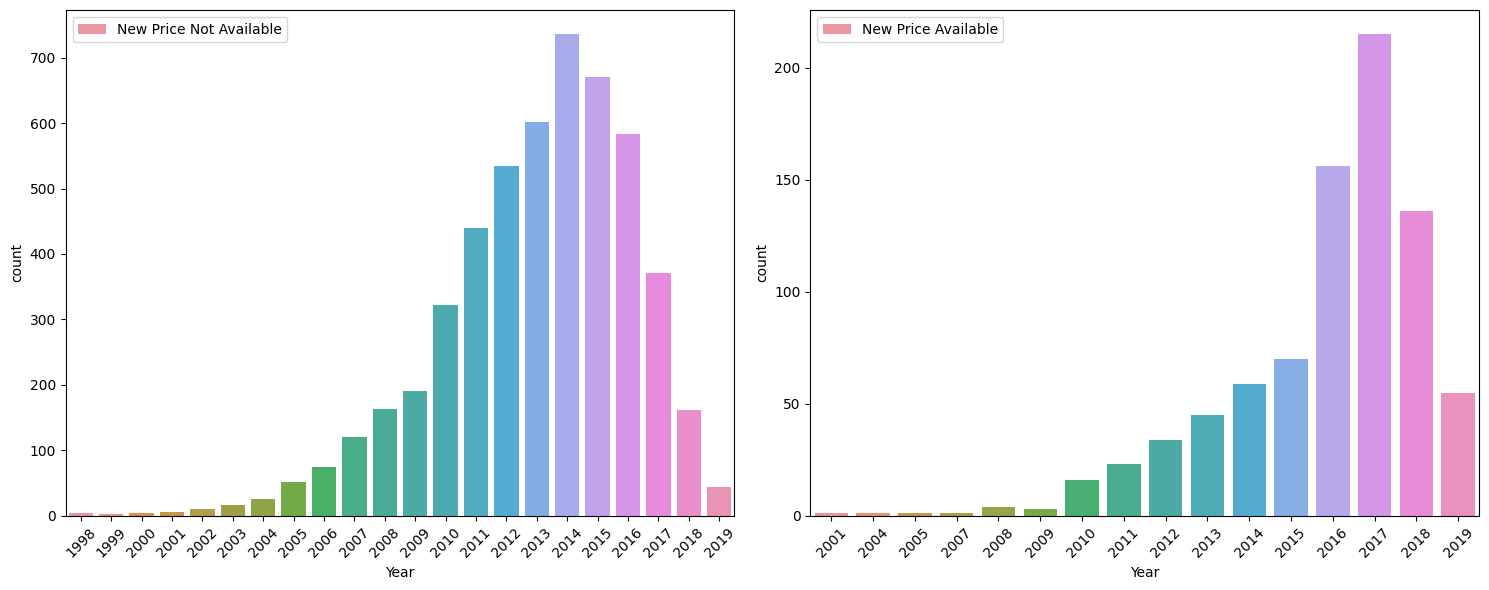

In [170]:
# To see this clearly let's observe for which period new car prices are not available
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) #To make subplots

data_new_car_price_not_available = data_new_log[data_new_log['New_price'].isnull()]  #To select data with null new price
sns.countplot(data=data_new_car_price_not_available, x="Year", label='New Price Not Available', ax=ax1)  #To plot for null new price data

data_new_car_price_available = data_new_log[data_new_log['New_price'].notnull()]     #To select data with available new price
sns.countplot(data=data_new_car_price_available, x="Year", label='New Price Available', ax=ax2)     #To plot for available new price data

#To rotate x tick labels so that they are readable
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


#To set legend for both axes
ax1.legend()
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

We have null values for new_car price even for 2019 manufactured car.The missing value are present randomly through out all the year.

New price value is available only for year 2001 and greater.

Lets see how price is distributed for data with new price avaiable and data with new price not available

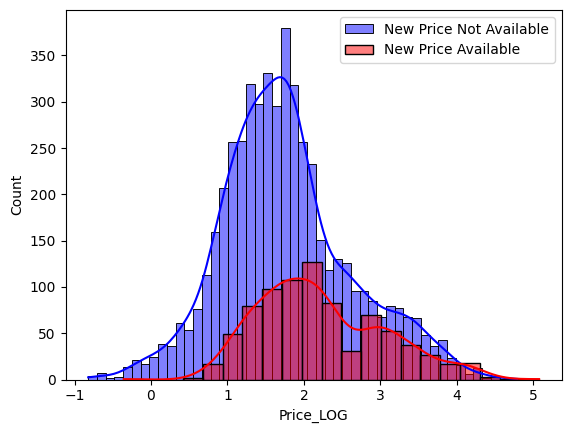

In [171]:
# For data with new price avaiable and data with new price not available
sns.histplot(data=data_new_car_price_not_available, x='Price_LOG', label='New Price Not Available', kde=True, color='blue')
sns.histplot(data=data_new_car_price_available, x='Price_LOG', label='New Price Available', kde=True, color='red')

# Legend
plt.legend()

# Show the plot
plt.show()

There is an overall count increase in new price not available, this is understandable as 74% of data has new price missing. Hence the overall increase in count is expected.

But the important point to be noted here is the price distribution. In both cases price almost has a bell shaped curve, that is price ranging from lowest to highest value, with more number of values at Price_LOG value 2. This is an indication that whether there is new_price or not, price distribution is similar, and we need not expect new_price to infulence the used car price.
Lets visulaize this as a line plot.


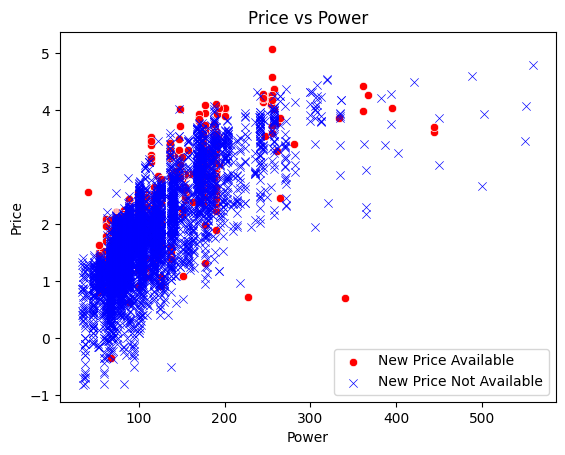

In [172]:
# Scatter plot for data with new price available
sns.scatterplot(x=data_new_car_price_available['Power'], y=data_new_car_price_available['Price_LOG'], label='New Price Available', color='red', marker='o')

# Scatter plot for data with new price not available
sns.scatterplot(x=data_new_car_price_not_available['Power'], y=data_new_car_price_not_available['Price_LOG'], label='New Price Not Available', color='blue', marker='x')

#Labels and title
plt.xlabel('Power')
plt.ylabel('Price')
plt.title('Price vs Power')

#Legend
plt.legend()

# To plot
plt.show()


For both new_price available and new_price not available, the price value has distribution over all the ranges. Thus we have two option either impute the new_price values using knn model or remove the whole new_price column, as based on bivariate analysis we do not see information of new price having an effect on the price.

Like used car price, new price has strong correlation with power and engine. The worth of a car can be determined by these two factors. When car become old, its price reduces from its orginal price, based on kilometers driven, current power and mileage. Hence whatever the intial price is, reduction in price is based on the car performance. More than the absolute value of new_car price, how much the car price reduced is important, which is goverend by factors like year, kilometer driven, mileage, power, and engine. Hence the new_car price need not be given importance. As in the above figure, the knowledge of new-car price didn't give us additional information about trend in used car price.

It would be better to remove the column becaues when we use knn model there is a chance of overfitting while performing regression, as 74% data is missing.

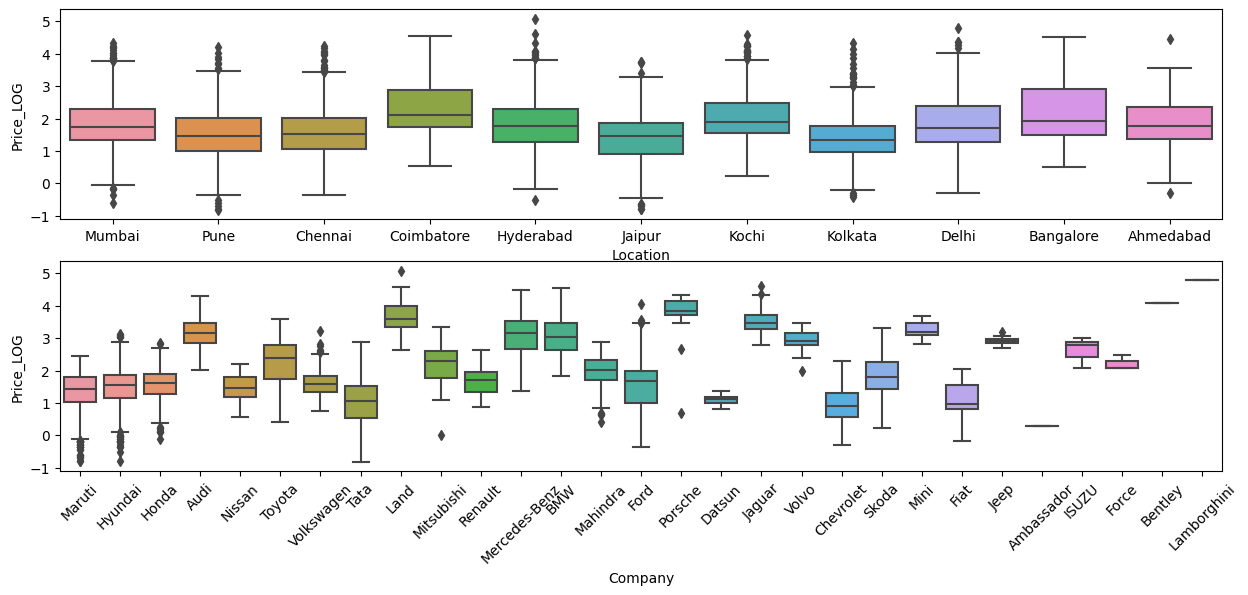

Mean of price_log is 1.83
Median of price_log is 1.73


In [173]:
#To see how price varies with various locations and company
#Not reiterating the function objectives that were explained before
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))  #To make subplots
sns.boxplot(x='Location', y='Price_LOG', data=data_new_log, ax=ax1) #First plot in ax1
sns.boxplot(x='Company', y='Price_LOG', data=data_new_log, ax=ax2)   #Second plot in ax2
plt.xticks(rotation=45)
plt.show()
print("Mean of price_log is",round(data_new_log["Price_LOG"].mean(),2))
print("Median of price_log is",round(data_new_log["Price_LOG"].median(),2))

All companies have cars with prices in all ranges. The median price of Maruti, Honda, and Hyundai lies in the same range. These companies are known for affordable cars and have a larger presence in India. There might not be an issue of availability meeting demand for these companies, due to the presence of manufacturing companies and service centers.

The prices of Porsche, Jeep, Lamborghini, Bentley, and Porsche are high, and they are known for their luxurious brand. The mean of the price log is 1.83, and the median is 1.73. These companies have a median price in that range. This means there is more demand for affordable brands. Kolkata seem to have lower median price for cars

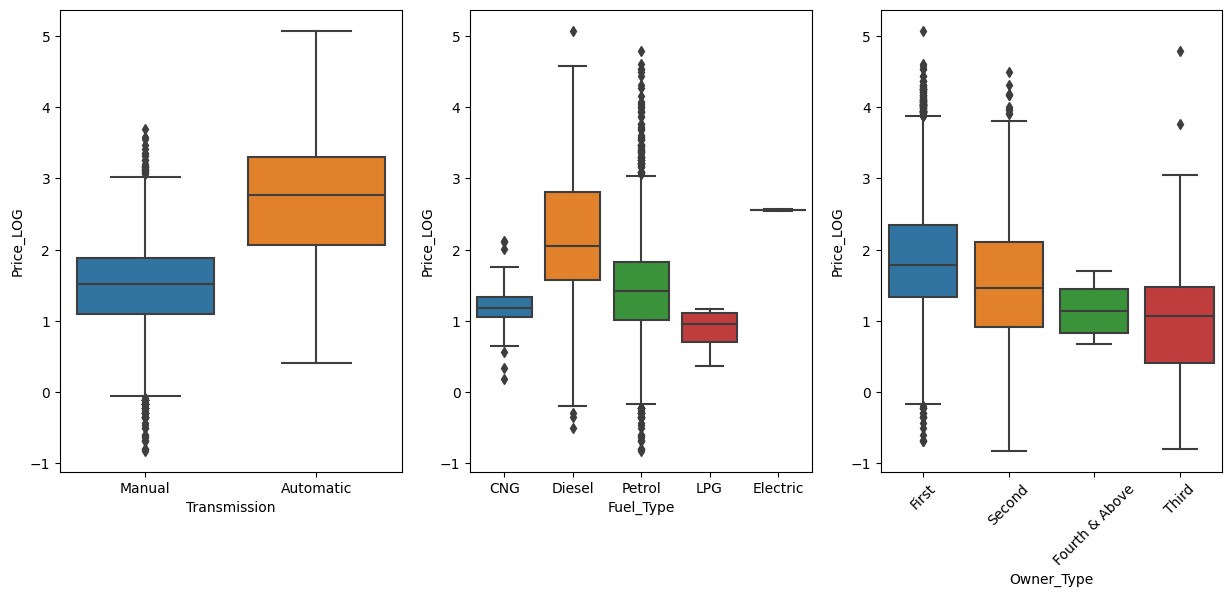

In [174]:
#Not reiterating the function objectives that were explained before
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
sns.boxplot(x='Transmission', y='Price_LOG', data=data_new_log, ax=ax1)
sns.boxplot(x='Fuel_Type', y='Price_LOG', data=data_new_log, ax=ax2)
sns.boxplot(x='Owner_Type', y='Price_LOG', data=data_new_log, ax=ax3)
plt.xticks(rotation=45)
plt.show()

The prices are high for automatic cars. The prices of electric cars do not fall within the overall price distribution outlier. The price reduces as the number of owners increases, with people preferring first-owner cars. More used cars are available from Maruti, Honda, and Hyundai, and their prices align near the mean and median of the price distribution. This could be because these brands are known for offering affordable cars rather than luxury ones. Petrol and diesel cars are more numerous, and they contribute more significantly to the price distribution compared to other fuel types.

For all locations, the price distribution has a median around 2. No location shows any extreme behavior. Other than differences in the number of cars, which also doesn't vary significantly, locations exhibit similar price behavior. This implies that all locations have a similar distribution of all brands and car types.

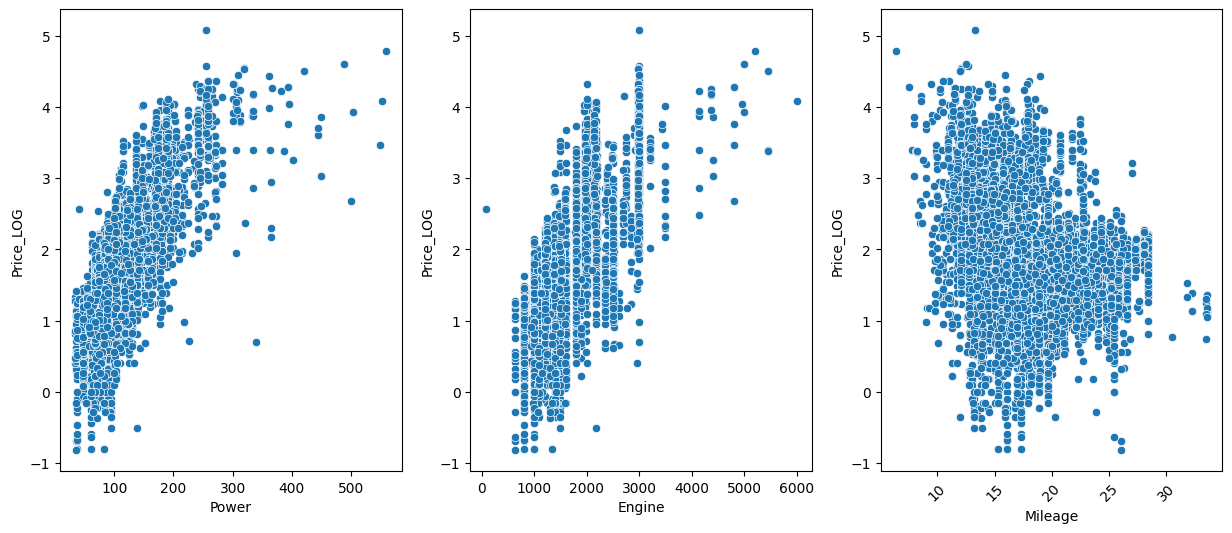

In [175]:
#Not reiterating the function objectives that were explained before
#Scatter plot to see how price varies with power, engine and mileage
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
sns.scatterplot(data=data_new_log, x='Power', y='Price_LOG',ax=ax1)
sns.scatterplot(data=data_new_log, x='Engine', y='Price_LOG',ax=ax2)
sns.scatterplot(data=data_new_log, x='Mileage', y='Price_LOG',ax=ax3)
plt.xticks(rotation=45)
plt.show()

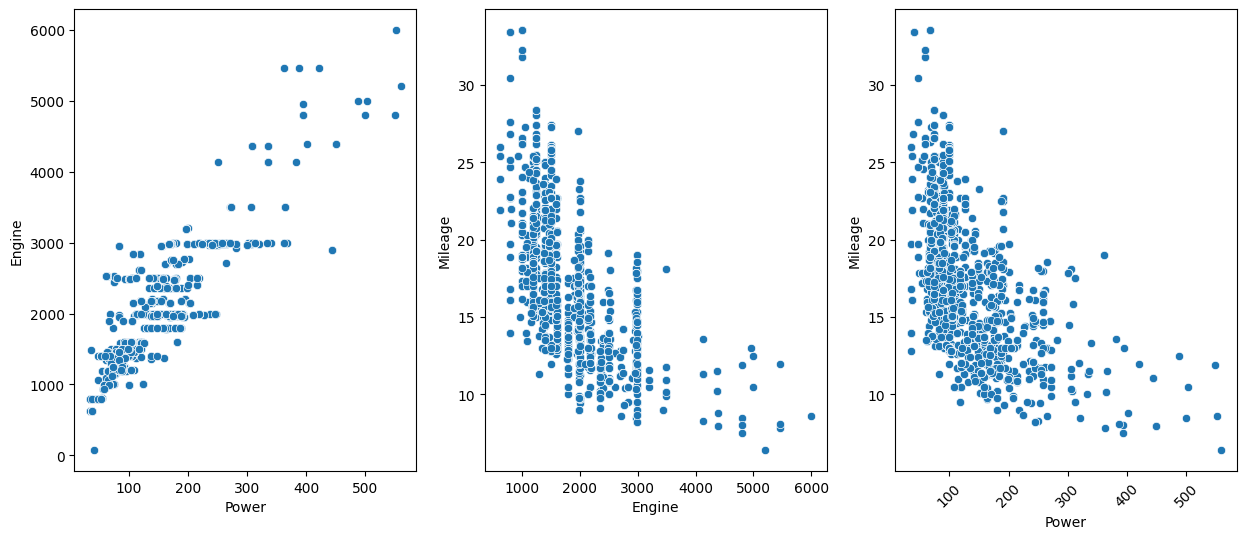

In [176]:
#Not reiterating the function objectives that were explained before
#Scatter plot to see how variable mileage, engine and power are correlated
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
sns.scatterplot(data=data_new_log, x='Power', y='Engine',ax=ax1)
sns.scatterplot(data=data_new_log, x='Engine', y='Mileage',ax=ax2)
sns.scatterplot(data=data_new_log, x='Power', y='Mileage',ax=ax3)
plt.xticks(rotation=45)
plt.show()

Car prices increase with power and engine capacity. This also means engine and power are positively correlated.

Mileage seems to have a negative correlation with price. High power and high engine vehicles will have lower mileage. The price increases due to higher power and engine capacity, resulting in lower mileage


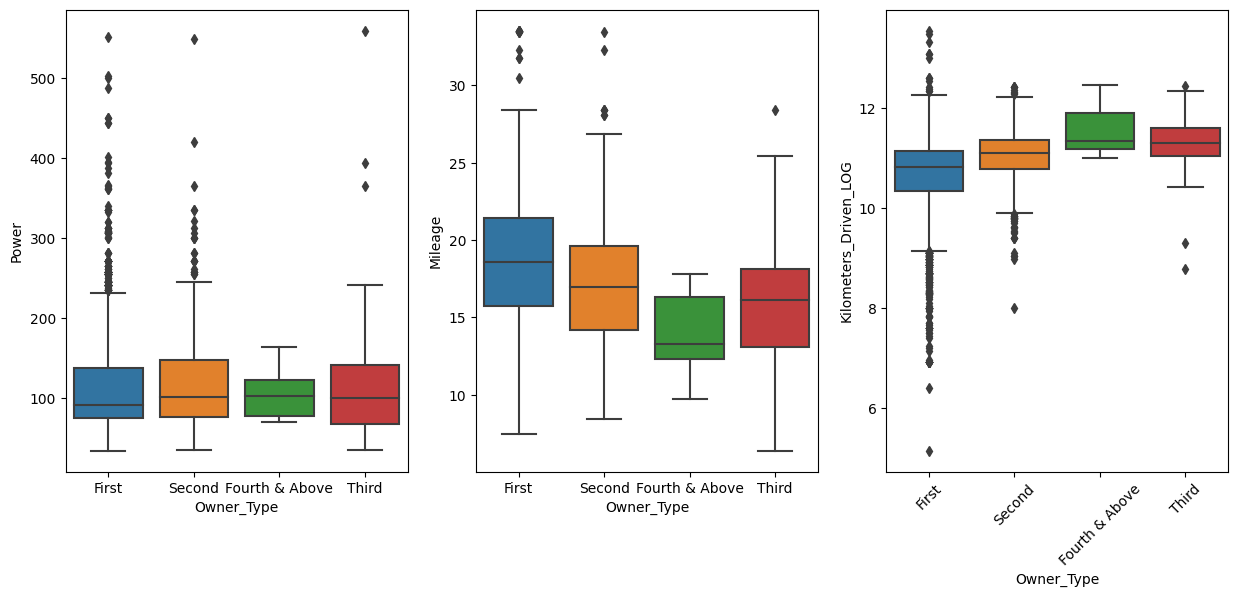

In [177]:
#Not reiterating the function objectives that were explained before
#To see ownertype realtion with power, mileage and kilometer driven
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
sns.boxplot(x='Owner_Type', y='Power', data=data_new_log, ax=ax1)
sns.boxplot(x='Owner_Type', y='Mileage', data=data_new_log, ax=ax2)
sns.boxplot(x='Owner_Type', y='Kilometers_Driven_LOG', data=data_new_log, ax=ax3)
plt.xticks(rotation=45)
plt.show()

First owner cars have the least median kilometers driven, followed by second, third, and fourth owners and above. This makes sense, as the number of owners increases, the overall distance the car was driven also increases. The mileage of first owner cars is higher, as they are less driven and more fuel-efficient due to being less old compared to second and higher owner cars. The median mileage also follows the order of first owner, second, then third, and lastly, fourth and above.

There are outliers for power in first and second owners. The median power for all different types of owners lies in the same range. Although the majority of cars of first and second owners have power in the range of 110, there are cars with higher power that fall into the outlier category.

In the box plot of power, we observed outliers, which we will address by log transforming so that there is no skewness after dealing with the missing values

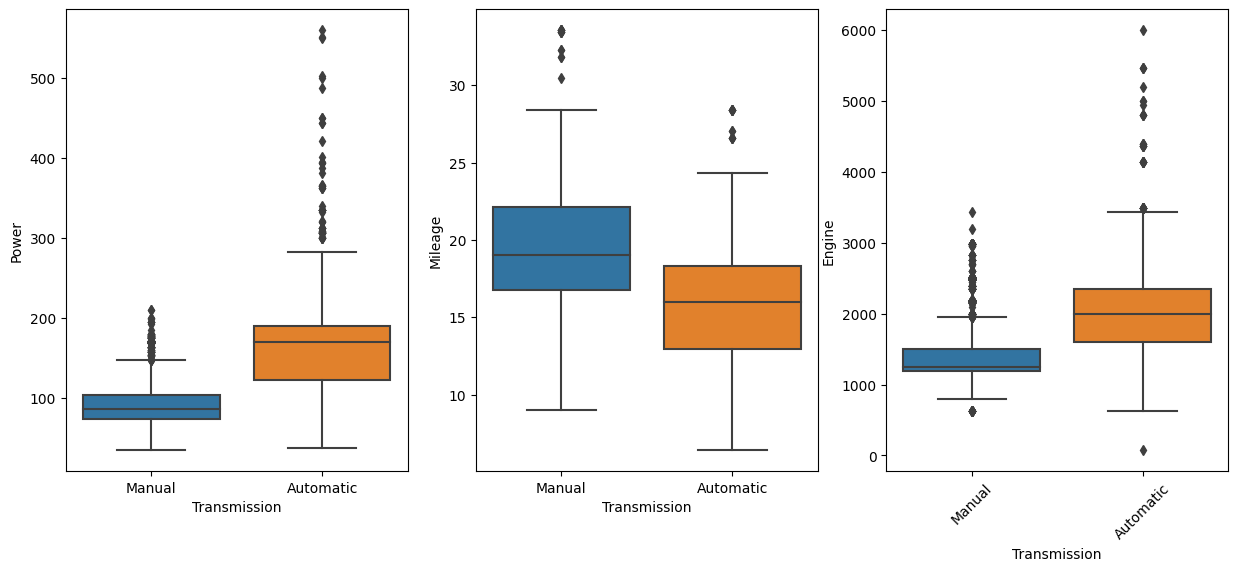

In [178]:
#Not reiterating the function objectives that were explained before
#To see tarnsmission realtion with power, mileage and engine
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
sns.boxplot(x='Transmission', y='Power', data=data_new_log, ax=ax1)
sns.boxplot(x='Transmission', y='Mileage', data=data_new_log, ax=ax2)
sns.boxplot(x='Transmission', y='Engine', data=data_new_log, ax=ax3)
plt.xticks(rotation=45)
plt.show()

Manual appears to have less power and lower engine capacity compared to automatic. This can be due to the different way in which power is measured in both. Automatics use a torque converter which allows the engine to keep running even when the vehicle is stationary. This design allows the engine to operate in its most efficient power band, which can lead to higher power figures.

The higher power figure shown in automatics could be the cause of lower mileage shown for automatics. Manual transmissions are often more fuel-efficient compared to automatics, especially when the driver is efficient at managing gear changes.

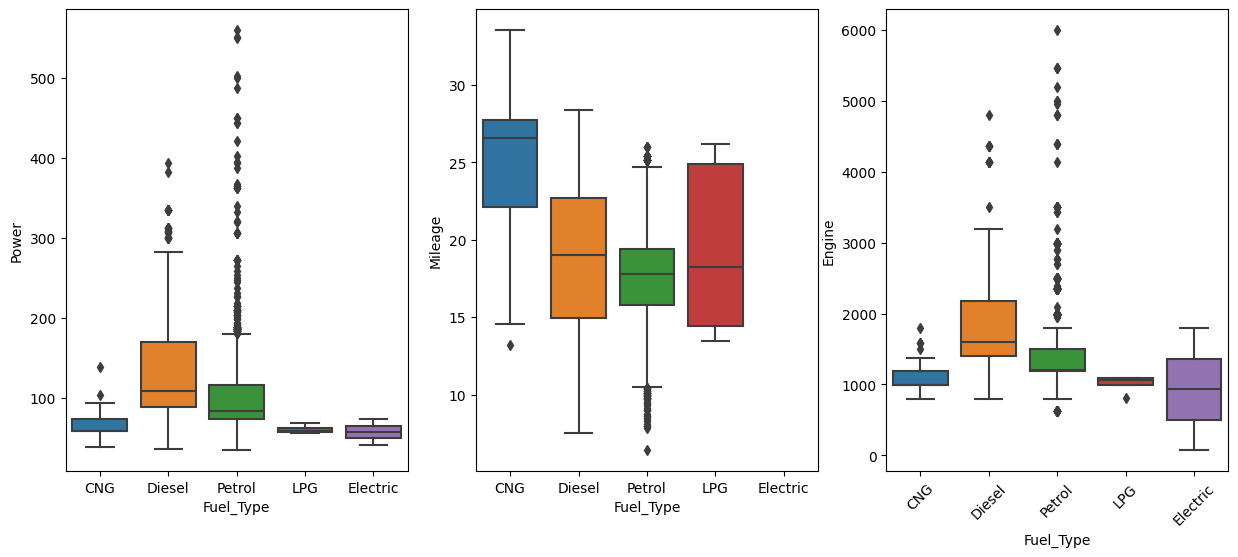

In [179]:
#Not reiterating the function objectives that were explained before
#To see fuel type relation with power, mileage and engine
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
sns.boxplot(x='Fuel_Type', y='Power', data=data_new_log, ax=ax1)
sns.boxplot(x='Fuel_Type', y='Mileage', data=data_new_log, ax=ax2)
sns.boxplot(x='Fuel_Type', y='Engine', data=data_new_log, ax=ax3)
plt.xticks(rotation=45)
plt.show()

The power of petrol is highly right-skewed. Considering medians, compared to diesel and petrol, CNG and LPG show less power.

CNG and LPG have lower energy content per unit volume compared to petrol but at the same time burn more efficiently because of higher octane content.

How power is measured in electric vehicles is different, hence comparing power directly will not be ideal.

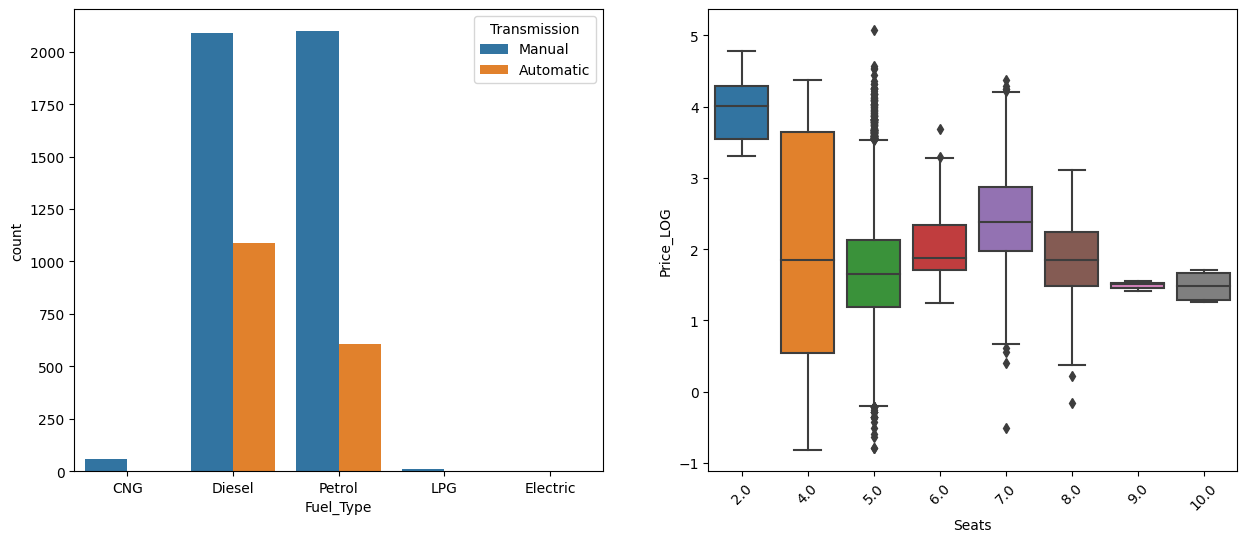

In [180]:
#Not reiterating the function objectives that were explained before
#To see how fuel type and transmission are related
#To see how price is related to seats
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='Fuel_Type', hue='Transmission', data=data_new_log, ax=ax1)
sns.boxplot(x='Seats', y='Price_LOG', data=data_new_log, ax=ax2)
plt.xticks(rotation=45)
plt.show()

In general, the number of manual vehicles is high, hence their number is high for all fuel types as well. For CNG and LPG, the vehicles are manual. In electric cars, the vehicle is automatic.

The vehicle price median is high for 2-seated vehicles and lower for 9-seated and 10-seated vehicles. 9-seated and 10-seated vehicles could be vehicles previously used for taxi purposes.

Most of the vehicles are 5-seated, and these have outliers.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

The company name or the brand name isolation is important, as mentioned before people can be selective about the brands. Based on this brand name has already been isolated under the column name Company, and this data has been used to indenify the number of unique brand names and for univariate and bivariate analysis. The code used was data_new['Company'] = data_new['Name'].str.split().str[0].

The name column is already eliminated from the set.


### **Missing value treatment**

Based on the previous bivariate analysis, from scatter plot for price versus power it was found that:

For both new_price available and new_price not available, the price value has distribution over all the ranges. We have two option either impute the new_price values using knn model or remove the whole new_price column. Based on bivariate analysis we do not see information of new price having an effect on the price.

Like used car price, new price has strong correlation with power and engine. The worth of a car can be determined by these two factors. When car become old, its price reduces from its new car price, based on kilometers driven, current power and mileage. Hence whatever the intial price is, reduction in price is based on the car performance. More than the absolute value of new_car price, how much the car price reduced is important, which is goverend by factors like year, kilometer driven, mileage, power, and engine. Hence the new_car price need not be given importance. As in the above figure, the knowledge of new-car price didn't give us additional information about trend in used car price.

It would be better to remove the column as when using knn model and as we have 74% missing data, there is a chance that we overfit when we build the model.

Thus new price will be remove  as part of imputation.

In [181]:
#To remove new price column
data0_new_log=data_new_log.copy()
data0_new_log = data0_new_log.drop('New_price', axis=1)
data0_new_log.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Price_LOG,Kilometers_Driven_LOG
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,0.559616,11.184421
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,2.525729,10.621327
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,1.504077,10.736397
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,1.791759,11.373663
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,2.875822,10.613246


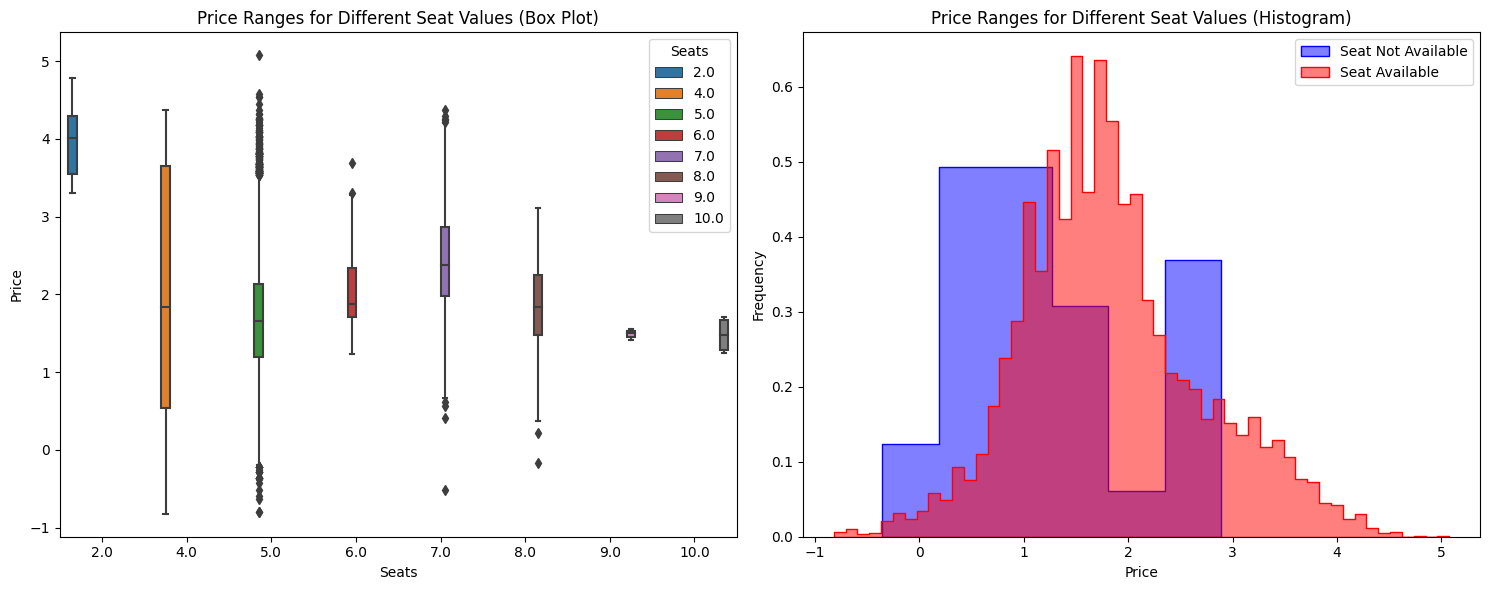

mean and median price for 5 seated car is 8.43 and 5.23 respectively


In [182]:
#Not reiterating the function objectives that were explained before
#Seats have some missing value


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='Seats', y='Price_LOG', data=data0_new_log, hue='Seats', ax=ax1)

sns.histplot(data=data0_new_log[data_new_log['Seats'].isnull()], x='Price_LOG', label='Seat Not Available', color='blue', ax=ax2, element='step', stat='density', common_norm=False, alpha=0.5)
sns.histplot(data=data0_new_log[data_new_log['Seats'].notnull()], x='Price_LOG', label='Seat Available', color='red', ax=ax2, element='step', stat='density', common_norm=False, alpha=0.5)


ax1.set_xlabel('Seats')
ax1.set_ylabel('Price')
ax1.set_title('Price Ranges for Different Seat Values (Box Plot)')

ax2.set_xlabel('Price')
ax2.set_ylabel('Frequency')
ax2.set_title('Price Ranges for Different Seat Values (Histogram)')

ax2.legend()


plt.tight_layout()


plt.show()
#To get the mean and median price for 5 seated vehicles

mean_price_for_seats_5 = round(data0_new_log[data_new_log['Seats'] == 5]['Price'].mean(),2)
median_price_for_seats_5 = round(data0_new_log[data_new_log['Seats'] == 5]['Price'].median(),2)
print("mean and median price for 5 seated car is", mean_price_for_seats_5,'and',median_price_for_seats_5,'respectively')

For seat range [2,9], most of the price lie in the price_log range [1,3]. Most number of seats are 5. May be to impute seat value, we can just use the mode of seat distribution that is 5 (from count plot of seat). For number of seats 5, the outlier price range is above 3 and below 0. The data with null seat values does not have price in this outlier range. Hence we can impute it with the mode of seats that is 5, so that we don't introduce any outliers.

Also since the missing value is less than 1 percent, this will not have major influence in the target variable. Lets visualize the same box plot after imputing the missing seat values as 5.

mean and median price for 5 seated car after imputing is 8.41 and 5.2 respectively


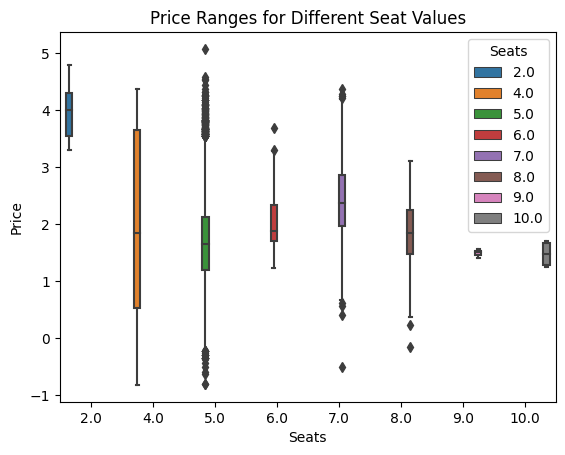

In [183]:
#Not reiterating the function objectives that were explained before
#Boxplot after imputing seat missing values

data1_new_log=data0_new_log.copy()
data1_new_log['Seats'].fillna(5, inplace=True)
sns.boxplot(x='Seats', y='Price_LOG', data=data1_new_log, hue='Seats')


plt.xlabel('Seats')
plt.ylabel('Price')
plt.title('Price Ranges for Different Seat Values');

#To get mean and median price for 5 seated car after imputing null seat values as 5
mean_price_for_seats_5_impute = round(data1_new_log[data1_new_log['Seats'] == 5]['Price'].mean(),2)
median_price_for_seats_5_impute = round(data1_new_log[data1_new_log['Seats'] == 5]['Price'].median(),2)
print("mean and median price for 5 seated car after imputing is", mean_price_for_seats_5_impute,'and',median_price_for_seats_5_impute,'respectively')

We can see after imputing null seat values as 5, the mean and median of target price for 5 seated cars didn't change much.

* Before imputing |      Mean=8.48  |      Median=5.21

* After imputing  |      Mean=8.46  |      Median=5.2

That is including the price for missing seat values, after imputing it as 5, didn't change the price distribution. The missing values were less than 1 percent.

Now there are missing values in both power and engine.

The missing values for power are more than 1%, and most of the missing engine values, which is 0.49 percent, have missing power values. Power and engine are positively correlated.

Let us remove the NaN for engine, by which many of the missing power values will be eliminated.

Once we have only missing value in one column, we can impute them based on KNN. When doing KNN, there will be complete values for all other columns for the algorithm to compare to.

Since mileage has only two rows with missing values, which are the electric cars, we will be removing that as well. This might not affect our analysis, as the category 'electric car' has very few values (2) compared to the overall data size, which is 6019 after removing the target price null values. To make any conclusions, we need more data points. So whatever trend we try to make out of these two values can come from error.

In [184]:
#To remove NaN for mileage and engine
data1_new_log = data1_new_log.dropna(subset=['Mileage', 'Engine'])
print(data1_new_log.shape)
(data1_new_log.isnull().sum()/data1_new_log.shape[0])*100

(5923, 14)


Location                 0.000000
Year                     0.000000
Kilometers_Driven        0.000000
Fuel_Type                0.000000
Transmission             0.000000
Owner_Type               0.000000
Mileage                  0.000000
Engine                   0.000000
Power                    1.333784
Seats                    0.000000
Price                    0.000000
Company                  0.000000
Price_LOG                0.000000
Kilometers_Driven_LOG    0.000000
dtype: float64

Now there ate 1.79% missing values in power. Let us try to impute that based on KNN. Now here when imputing using knn model, we should remove the target variable to avoid data leakage. When we did imputation for seats we just imputed based on  mode of seats, so it was fine to keep the target variable in the data. At this point lets seperate the target and independent variables.



In [185]:
#To remove target Price column before KNN imputation
data2_new_log=data1_new_log.copy()
x_knn=data2_new_log.drop(['Price','Price_LOG'],axis=1)
print(x_knn.shape)
(x_knn.isnull().sum()/x_knn.shape[0])*100

(5923, 12)


Location                 0.000000
Year                     0.000000
Kilometers_Driven        0.000000
Fuel_Type                0.000000
Transmission             0.000000
Owner_Type               0.000000
Mileage                  0.000000
Engine                   0.000000
Power                    1.333784
Seats                    0.000000
Company                  0.000000
Kilometers_Driven_LOG    0.000000
dtype: float64

In [186]:
#Impute power column
column_to_impute = ['Power']

# Make a data copy
data_subset = x_knn[column_to_impute].copy()

# Initialize KNNImputer with the desired number of neighbors (k)
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
data_subset_imputed = imputer.fit_transform(data_subset)

# To convert imputed data to data frame format
data_subset_imputed_df = pd.DataFrame(data_subset_imputed, columns=column_to_impute)

# To eplace power column, after imputing the null values
x_knn[column_to_impute] = data_subset_imputed_df

#To check if null values are still present
print(x_knn.shape)
(x_knn.isnull().sum()/x_knn.shape[0])*100

(5923, 12)


Location                 0.00000
Year                     0.00000
Kilometers_Driven        0.00000
Fuel_Type                0.00000
Transmission             0.00000
Owner_Type               0.00000
Mileage                  0.00000
Engine                   0.00000
Power                    1.57015
Seats                    0.00000
Company                  0.00000
Kilometers_Driven_LOG    0.00000
dtype: float64

KNN imputation doesn't seem to work quite well in the data set, as we can see there are still null values and the null value percent increased. This could be because the distance metric we are using might not be right, the number of neighbours are not enough, outliers could be an issue.

Thus instead of KNN imputation we will do random imputation based on the existing power distribution

In [187]:
# Impute power column
#Make a data copy
x_rand_impute=data1_new_log.copy()
#Use np.random to generate random values based on existing power distribution
random_values_power = np.random.choice(x_rand_impute['Power'].dropna(), len(x_rand_impute[x_rand_impute['Power'].isnull()]))
#Impute null values using random values generated
x_rand_impute.loc[x_rand_impute['Power'].isnull(), 'Power'] = random_values_power

#Check if there are null values still present
print(x_rand_impute.shape)
(x_rand_impute.isnull().sum()/x_rand_impute.shape[0])*100

(5923, 14)


Location                 0.0
Year                     0.0
Kilometers_Driven        0.0
Fuel_Type                0.0
Transmission             0.0
Owner_Type               0.0
Mileage                  0.0
Engine                   0.0
Power                    0.0
Seats                    0.0
Price                    0.0
Company                  0.0
Price_LOG                0.0
Kilometers_Driven_LOG    0.0
dtype: float64

Now we have no null values. Lets check the distribution of power before and after imputing.

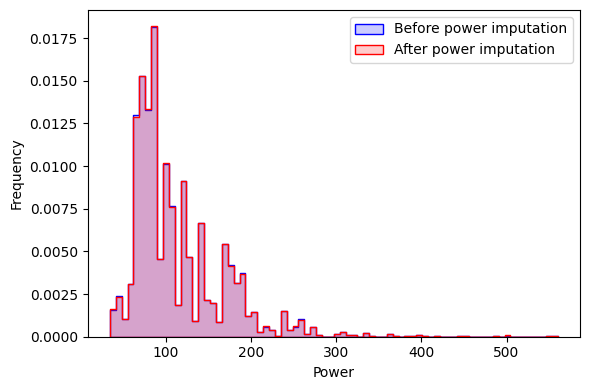

In [188]:
#Not reiterating the function objectives that were explained before
#To check power distribution before and after imputing
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))

sns.histplot(data=data1_new_log, x='Power', label='Before power imputation', color='blue', ax=ax1, element='step', stat='density', common_norm=False, alpha=0.2)
sns.histplot(data=x_rand_impute, x='Power', label='After power imputation', color='red', ax=ax1, element='step', stat='density', common_norm=False, alpha=0.2)
ax1.set_xlabel('Power')
ax1.set_ylabel('Frequency')
ax1.legend();
plt.tight_layout()
plt.show()


We see that doing random imputation the power distribution hasn't changed. This is important as we are just imputing for 1.7% missing values. Now that we have imputed power values, lets log transform it


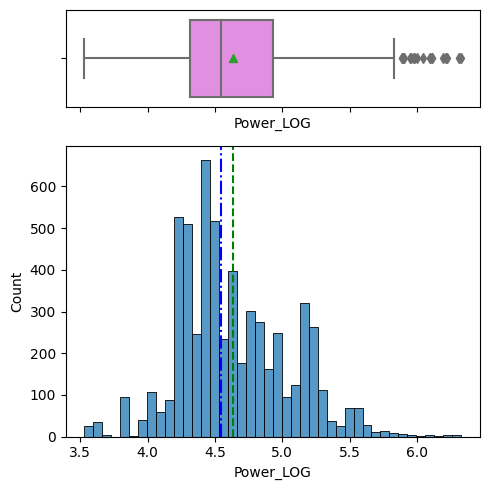

In [189]:
#To log transform skewed power data
#Using np.log function for log transforming
x_rand_impute["Power_LOG"]=np.log(x_rand_impute['Power'])
hist_box_fun(x_rand_impute, "Power_LOG")
plt.tight_layout()
plt.show()


Now the power column do not look skewed

## **Important Insights from EDA and Data Preprocessing**

* The price is positively correlated with Power and Engine.
* The price is negatively correlated with year. Old cars are more driven and require repeated maintenece due to less efficent components.
* Power and Engine might have multicollinearity issues.
* The Price, Kilometers Driven, and Power columns were right-skewed; these were log-transformed. Log data can mitigate the effect of skewness, thus preventing biased estimates while performing regression.
* Kilometers driven does not show a strong correlation, which could be due to the outliers.
* Mileage decreases with an increase in power, resulting in a higher price.
* As for categorical variables, there are more available manual cars compared to automatic.
* Manual cars have a lower median price compared to automatic.
* Manual cars are less expensive, probably due to fewer components, which means fewer components to maintain.
* Manual cars seem to be more fuel-efficient (less power, high mileage) compared to automatic.
* The majority of cars run on petrol and diesel. There are very few LPG, CNG, and electric cars.
* There are more available first-owner used cars. As the number of owners increases, the car is more driven, experiences more component damage, requires higher maintenance, and is hence less desirable in the market.
* The majority of cars are manual, running on diesel and petrol, with 5 seats.
* Location doesn't seem to have an influence on the price.
* Maruti, Honda, and Hyundai are the most available car brands. The price of most of these cars lies near the average. These brands are known for affordability, and more cars are available due to the presence of manufacturing and service facilities.
* Many luxurious car brands have limited service facilities in India, which limits car availability. Very few people prefer used cars of those brands as they are pricey.
------------------------------------------------------------------------------
* There were some unrealistic values for kilometers driven. A used car manufactured in 2017 showed 6.6 million kilometers driven. This is definitely an error, and hence that data point was removed.
* The next highest point was 7.7 lakh, which is still high for a passenger vehicle manufactured in 2013. But assuming this car has been used for delivery or taxi purposes previously, this might be an achievable number.
* There were some rows with mileage zero. This was not possible because the least driven car in the set had traveled a distance of 176 km. Hence mileage cannot be zero, as mileage is the ratio of kilometers driven to fuel consumption.
* Since we don't have fuel consumption data, the rows with mileage zero were removed, which was 1.1 percent of the whole data set.
* There were missing values in new price, power, engine, and seats.
* The null values in seats were imputed using the mode value which is 5. Most cars had seat number 5, and imputing null seats with 5 didn't change the 5-seated car price distribution and didn't introduce outliers.
* The null values in mileage and engine were removed, as they contributed less than 0.5 percent of the data.
* The null values of power were imputed by generating random power values based on the current distribution. KNN imputer failed, probably due to the outlier presence.
--------------------------------------------------------------------------------
* The expected highly important features for price are power, engine, year, manual/transmission, some car companies, and mileage.
--------------------------------------------------------------------------------

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

We drop Name, as name itself has many unique values, and the specific car name will not give much information about the price based on regression analysis. We have extracted a useful quantity brand or company name from "name" which will be treated as a categorical cariable. People might choose specific brands over the other, the demand for which can result in affordable prices.

Since we have log transformed power, and kilometers driven, we will only keep the log transformed of that column.

Including the not log transformed one introduce redundant information and skewness.

We will remove price and price log as it is the target variable



In [190]:
#I have already removed name column before
x=x_rand_impute.drop(['Price','Price_LOG','Kilometers_Driven','Power'],axis=1)
y=x_rand_impute['Price_LOG']
print(x.head())
print('x shape is',x.shape,'and y shape is',y.shape)

     Location  Year Fuel_Type Transmission Owner_Type  Mileage  Engine  Seats  \
0      Mumbai  2010       CNG       Manual      First    26.60   998.0    5.0   
1        Pune  2015    Diesel       Manual      First    19.67  1582.0    5.0   
2     Chennai  2011    Petrol       Manual      First    18.20  1199.0    5.0   
3     Chennai  2012    Diesel       Manual      First    20.77  1248.0    7.0   
4  Coimbatore  2013    Diesel    Automatic     Second    15.20  1968.0    5.0   

   Company  Kilometers_Driven_LOG  Power_LOG  
0   Maruti              11.184421   4.063198  
1  Hyundai              10.621327   4.837868  
2    Honda              10.736397   4.485260  
3   Maruti              11.373663   4.485936  
4     Audi              10.613246   4.947340  
x shape is (5923, 11) and y shape is (5923,)


In [191]:
#To convert categorical variable to dummies
x = pd.get_dummies(
    x,
    columns = x.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)
x

,Year,Mileage,Engine,Seats,Kilometers_Driven_LOG,Power_LOG,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,2010,26.60,998.0,5.0,11.184421,4.063198,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,1582.0,5.0,10.621327,4.837868,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,18.20,1199.0,5.0,10.736397,4.485260,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,20.77,1248.0,7.0,11.373663,4.485936,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,15.20,1968.0,5.0,10.613246,4.947340,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,28.40,1248.0,5.0,10.217020,4.304065,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6015,2015,24.40,1120.0,5.0,11.512925,4.262680,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,2012,14.00,2498.0,8.0,10.915088,4.718499,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,2013,18.90,998.0,5.0,10.736397,4.206184,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
#To split test and train data
#I will be using 30% data as test data and 70% as train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True, random_state = 1)
print('Shape of train data',x_train.shape, 'and shape of test data',x_test.shape)

Shape of train data (4146, 51) and shape of test data (1777, 51)


In [193]:
#ref: HOSPITAL_LOS_Prediction
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / (targets)) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

##Linear Regression

In [194]:
#The price_log has zero values, which can result in infinite MAPE value, as in the denomiator of MAPE we have actual value
#Hence I will remove zero from y_test and y_train
non_zero_mask_test = y_test != 0
non_zero_mask_train = y_train != 0
# Filter y_test and X_train to keep only non-zero values
y_test = y_test[non_zero_mask_test]
y_train = y_train[non_zero_mask_train]
x_train = x_train[non_zero_mask_train]
x_test = x_test[non_zero_mask_test]

#Lets scale the data
# We are using min-max scaler as compared to standard scaler, its less sensitive to outliers
#Scaling is important as it prevents one feature dominating due to different scale.
scaler=MinMaxScaler()

x_train_sc=scaler.fit_transform(x_train)
x_train_sc=pd.DataFrame(x_train_sc,index=x_train.index,columns=x_train.columns)

x_test_sc=scaler.fit_transform(x_test)
x_test_sc=pd.DataFrame(x_test_sc,index=x_test.index,columns=x_test.columns)

#Lets add the constant(intercept term in linear regression fit)

x_train_lin_sc=sm.add_constant(x_train_sc)
x_test_lin_sc=sm.add_constant(x_test_sc)

x_train_lin_sc.head()



,const,Year,Mileage,Engine,Seats,Kilometers_Driven_LOG,Power_LOG,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
5278,1.0,0.952381,0.166175,0.478973,0.625,0.504932,0.626309,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,1.0,0.571429,0.162122,0.348530,0.375,0.713216,0.528813,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3081,1.0,0.666667,0.611643,0.143655,0.375,0.722605,0.346096,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1750,1.0,0.809524,0.245394,0.181243,0.375,0.734074,0.392719,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2326,1.0,0.809524,0.302874,0.255862,0.375,0.692562,0.528623,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
#model 0 linear regression
model0_lin=sm.OLS(y_train, x_train_lin_sc).fit()

# Get the model summary
model0_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_LOG   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1161.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:23:32   Log-Likelihood:                 438.11
No. Observations:                4137   AIC:                            -772.2
Df Residuals:                    4085   BIC:                            -443.2
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.1123      0.231     -0.487      0.626      -0.564       0.340
Year                          2.4748      0.033     74.051      0.000       2.409       2.540
Mileage                      -0.2945      0.045     -6.537      0.000      -0.383      -0.206
Engine                        1.0265      0.085     12.092      0.000       0.860       1.193
Seats                         0.2915      0.054      5.430      0.000       0.186       0.397
Kilometers_Driven_LOG        -0.5472      0.053    -10.321      0.000      -0.651      -0.443
Power_LOG                     1.9656      0.058     33.668      0.000       1.851       2.080
Location_Bangalore            0.1381      0.023      5.986      0.000       0.093       0.183
Location_Chennai              0.0372      0.022      1.691      0.091      -0.006       0.080
Location_Coimbatore           0.1007      0.021      4.783      0.000       0.059       0.142
Location_Delhi               -0.0780      0.021     -3.687      0.000      -0.119      -0.037
Location_Hyderabad            0.1185      0.021      5.746      0.000       0.078       0.159
Location_Jaipur              -0.0213      0.023     -0.940      0.347      -0.066       0.023
Location_Kochi               -0.0278      0.021     -1.316      0.188      -0.069       0.014
Location_Kolkata             -0.2340      0.022    -10.851      0.000      -0.276      -0.192
Location_Mumbai              -0.0543      0.021     -2.640      0.008      -0.095      -0.014
Location_Pune                -0.0529      0.021     -2.524      0.012      -0.094      -0.012
Fuel_Type_Diesel              0.1580      0.036      4.330      0.000       0.086       0.229
Fuel_Type_LPG                -0.0438      0.115     -0.379      0.705      -0.270       0.182
Fuel_Type_Petrol             -0.0600      0.037     -1.609      0.108      -0.133       0.013
Transmission_Manual          -0.0929      0.011     -8.355      0.000      -0.115      -0.071
Owner_Type_Fourth & Above     0.0595      0.110      0.540      0.589      -0.157       0.276
Owner_Type_Second            -0.0718      0.010     -7.109      0.000      -0.092      -0.052
Owner_Type_Third             -0.1108      0.029     -3.847      0.000      -0.167      -0.054
Company_Audi                  0.0848      0.223      0.380      0.704      -0.353       0.523
Company_BMW                   0.0768      0.224      0.344      0.731      -0.361       0.515
Company_Bentley               0.5239      0.317      1.652      0.099      -0.098       1.146
Company_Chevrolet            -0.8432      0.223     -3.777      0.000      -1.281      -0.406
Company_Datsun               -0.9017      0.234     -3.852      0.000      -1.361      -0.443
Company_Fiat                 -0.7812      0.229     -3.408      0.001      

In [196]:
#Lets check for multicollinearity
#To check multicollinearity we find Variance infaltion factor.
vif_series = pd.Series(
    [variance_inflation_factor(x_train_lin_sc.values, i) for i in range(x_train_lin_sc.shape[1])],
    index = x_train_lin_sc.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))


VIF Scores: 

const                        4583.327972
Year                            2.189306
Mileage                         4.153345
Engine                          7.633134
Seats                           2.567205
Kilometers_Driven_LOG           1.766485
Power_LOG                       6.418331
Location_Bangalore              2.547654
Location_Chennai                3.018728
Location_Coimbatore             3.731893
Location_Delhi                  3.397069
Location_Hyderabad              3.905872
Location_Jaipur                 2.660387
Location_Kochi                  3.687040
Location_Kolkata                3.240748
Location_Mumbai                 4.174971
Location_Pune                   3.591145
Fuel_Type_Diesel               28.505759
Fuel_Type_LPG                   1.109094
Fuel_Type_Petrol               29.688237
Transmission_Manual             2.187834
Owner_Type_Fourth & Above       1.012639
Owner_Type_Second               1.169761
Owner_Type_Third                1.123844
Co

It is not a good idea to consider vif score for categorical dummy variables, as they will be correlated to other categories. For all the other numerical variable except power and engine has less than 5 vif score.

Let us drop engine and check VIF score, Engine and Power are correlated

In [197]:
#To drop column engine in test and train data
x_train1_lin_sc=x_train_lin_sc.drop(['Engine'],axis=1)
x_test1_lin_sc=x_test_lin_sc.drop(['Engine'],axis=1)

#To check vif score after dropping engine
vif_series = pd.Series(
    [variance_inflation_factor(x_train1_lin_sc.values, i) for i in range(x_train1_lin_sc.shape[1])],
    index = x_train1_lin_sc.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))


VIF Scores: 

const                        4563.150344
Year                            2.168726
Mileage                         3.750272
Seats                           2.470291
Kilometers_Driven_LOG           1.762818
Power_LOG                       4.047654
Location_Bangalore              2.547255
Location_Chennai                3.018351
Location_Coimbatore             3.725872
Location_Delhi                  3.397069
Location_Hyderabad              3.904701
Location_Jaipur                 2.658920
Location_Kochi                  3.687036
Location_Kolkata                3.240656
Location_Mumbai                 4.174497
Location_Pune                   3.590797
Fuel_Type_Diesel               28.490703
Fuel_Type_LPG                   1.108646
Fuel_Type_Petrol               29.257079
Transmission_Manual             2.187600
Owner_Type_Fourth & Above       1.012411
Owner_Type_Second               1.169678
Owner_Type_Third                1.123459
Company_Audi                  167.451229
Co

Now all the numerical variable Vif score is less than 5


In [198]:
#model 1 linear regression after dropping engine
model1_lin=sm.OLS(y_train, x_train1_lin_sc).fit()

# Get the model summary
model1_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_LOG   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1141.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:23:40   Log-Likelihood:                 365.36
No. Observations:                4137   AIC:                            -628.7
Df Residuals:                    4086   BIC:                            -306.0
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0727      0.234      0.310      0.756      -0.386       0.532
Year                          2.4357      0.034     71.956      0.000       2.369       2.502
Mileage                      -0.4642      0.044    -10.656      0.000      -0.550      -0.379
Seats                         0.4177      0.054      7.793      0.000       0.313       0.523
Kilometers_Driven_LOG        -0.5764      0.054    -10.695      0.000      -0.682      -0.471
Power_LOG                     2.3946      0.047     50.756      0.000       2.302       2.487
Location_Bangalore            0.1416      0.023      6.031      0.000       0.096       0.188
Location_Chennai              0.0402      0.022      1.795      0.073      -0.004       0.084
Location_Coimbatore           0.1109      0.021      5.181      0.000       0.069       0.153
Location_Delhi               -0.0780      0.022     -3.625      0.000      -0.120      -0.036
Location_Hyderabad            0.1229      0.021      5.853      0.000       0.082       0.164
Location_Jaipur              -0.0149      0.023     -0.645      0.519      -0.060       0.030
Location_Kochi               -0.0275      0.021     -1.281      0.200      -0.070       0.015
Location_Kolkata             -0.2326      0.022    -10.600      0.000      -0.276      -0.190
Location_Mumbai              -0.0569      0.021     -2.721      0.007      -0.098      -0.016
Location_Pune                -0.0504      0.021     -2.364      0.018      -0.092      -0.009
Fuel_Type_Diesel              0.1478      0.037      3.983      0.000       0.075       0.221
Fuel_Type_LPG                -0.0718      0.117     -0.612      0.541      -0.302       0.158
Fuel_Type_Petrol             -0.1143      0.038     -3.035      0.002      -0.188      -0.040
Transmission_Manual          -0.0943      0.011     -8.334      0.000      -0.116      -0.072
Owner_Type_Fourth & Above     0.0395      0.112      0.352      0.725      -0.180       0.259
Owner_Type_Second            -0.0728      0.010     -7.086      0.000      -0.093      -0.053
Owner_Type_Third             -0.1044      0.029     -3.561      0.000      -0.162      -0.047
Company_Audi                  0.0150      0.227      0.066      0.947      -0.430       0.460
Company_BMW                   0.0186      0.227      0.082      0.935      -0.427       0.465
Company_Bentley               1.0054      0.320      3.140      0.002       0.378       1.633
Company_Chevrolet            -0.9258      0.227     -4.078      0.000      -1.371      -0.481
Company_Datsun               -0.9596      0.238     -4.029      0.000      -1.427      -0.493
Company_Fiat                 -0.8885      0.233     -3.812      0.000      -1.345      -0.431
Company_Force                -0.5025      0.276     -1.820      0.069      

There are insignificant values for 'Fuel_Type_LPG','Owner_Type_Fourth & Above',and in some companies and locations

In [199]:
# model2 linear regression
x_train2_lin_sc=x_train1_lin_sc.drop(['Fuel_Type_LPG','Owner_Type_Fourth & Above'],axis=1)

x_test2_lin_sc=x_test1_lin_sc.drop(['Fuel_Type_LPG','Owner_Type_Fourth & Above'],axis=1)
model2_lin=sm.OLS(y_train, x_train2_lin_sc).fit()

# Get the model summary
model2_lin.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_LOG   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1189.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:23:40   Log-Likelihood:                 365.11
No. Observations:                4137   AIC:                            -632.2
Df Residuals:                    4088   BIC:                            -322.2
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0653      0.234      0.280      0.780      -0.393       0.524
Year                      2.4353      0.034     72.044      0.000       2.369       2.502
Mileage                  -0.4633      0.043    -10.656      0.000      -0.548      -0.378
Seats                     0.4183      0.054      7.809      0.000       0.313       0.523
Kilometers_Driven_LOG    -0.5762      0.054    -10.694      0.000      -0.682      -0.471
Power_LOG                 2.3955      0.047     50.815      0.000       2.303       2.488
Location_Bangalore        0.1415      0.023      6.029      0.000       0.095       0.188
Location_Chennai          0.0403      0.022      1.801      0.072      -0.004       0.084
Location_Coimbatore       0.1109      0.021      5.182      0.000       0.069       0.153
Location_Delhi           -0.0781      0.022     -3.629      0.000      -0.120      -0.036
Location_Hyderabad        0.1225      0.021      5.837      0.000       0.081       0.164
Location_Jaipur          -0.0150      0.023     -0.651      0.515      -0.060       0.030
Location_Kochi           -0.0275      0.021     -1.282      0.200      -0.070       0.015
Location_Kolkata         -0.2327      0.022    -10.609      0.000      -0.276      -0.190
Location_Mumbai          -0.0570      0.021     -2.727      0.006      -0.098      -0.016
Location_Pune            -0.0505      0.021     -2.366      0.018      -0.092      -0.009
Fuel_Type_Diesel          0.1546      0.035      4.365      0.000       0.085       0.224
Fuel_Type_Petrol         -0.1074      0.036     -2.991      0.003      -0.178      -0.037
Transmission_Manual      -0.0943      0.011     -8.339      0.000      -0.116      -0.072
Owner_Type_Second        -0.0729      0.010     -7.105      0.000      -0.093      -0.053
Owner_Type_Third         -0.1045      0.029     -3.567      0.000      -0.162      -0.047
Company_Audi              0.0147      0.227      0.065      0.948      -0.431       0.460
Company_BMW               0.0182      0.227      0.080      0.936      -0.428       0.464
Company_Bentley           1.0050      0.320      3.140      0.002       0.377       1.633
Company_Chevrolet        -0.9261      0.227     -4.080      0.000      -1.371      -0.481
Company_Datsun           -0.9599      0.238     -4.031      0.000      -1.427      -0.493
Company_Fiat             -0.8887      0.233     -3.813      0.000      -1.346      -0.432
Company_Force            -0.5030      0.276     -1.823      0.068      -1.044       0.038
Company_Ford             -0.6578      0.226     -2.908      0.004      -1.101      -0.214
Company_Honda            -0.5960      0.227     -2.630      0.009      -1.040      -0.152
Company_Hyundai          -0.6114      0.226     -2.703      0.007      -1.055      -0.168
Company_ISUZU          

In [200]:
#model 3 liner regression
#Dropping some insignificant locations which has p value much greater than 0.05
x_train3_lin_sc=x_train2_lin_sc.drop(['Location_Chennai','Location_Jaipur','Location_Kochi'],axis=1)

x_test3_lin_sc=x_test2_lin_sc.drop(['Location_Chennai','Location_Jaipur','Location_Kochi'],axis=1)
model3_lin=sm.OLS(y_train, x_train3_lin_sc).fit()

# Get the model summary
model3_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_LOG   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1263.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:23:40   Log-Likelihood:                 356.54
No. Observations:                4137   AIC:                            -621.1
Df Residuals:                    4091   BIC:                            -330.0
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0976      0.233      0.418      0.676      -0.360       0.555
Year                      2.4108      0.033     72.889      0.000       2.346       2.476
Mileage                  -0.4546      0.043    -10.453      0.000      -0.540      -0.369
Seats                     0.4231      0.054      7.886      0.000       0.318       0.528
Kilometers_Driven_LOG    -0.5790      0.054    -10.735      0.000      -0.685      -0.473
Power_LOG                 2.3996      0.047     50.878      0.000       2.307       2.492
Location_Bangalore        0.1436      0.016      8.984      0.000       0.112       0.175
Location_Coimbatore       0.1158      0.013      9.180      0.000       0.091       0.141
Location_Delhi           -0.0754      0.013     -5.773      0.000      -0.101      -0.050
Location_Hyderabad        0.1242      0.012     10.252      0.000       0.100       0.148
Location_Kolkata         -0.2304      0.014    -16.731      0.000      -0.257      -0.203
Location_Mumbai          -0.0542      0.012     -4.520      0.000      -0.078      -0.031
Location_Pune            -0.0490      0.013     -3.880      0.000      -0.074      -0.024
Fuel_Type_Diesel          0.1583      0.035      4.469      0.000       0.089       0.228
Fuel_Type_Petrol         -0.1051      0.036     -2.926      0.003      -0.176      -0.035
Transmission_Manual      -0.0952      0.011     -8.406      0.000      -0.117      -0.073
Owner_Type_Second        -0.0716      0.010     -6.978      0.000      -0.092      -0.051
Owner_Type_Third         -0.0952      0.029     -3.258      0.001      -0.152      -0.038
Company_Audi             -0.0128      0.227     -0.056      0.955      -0.459       0.433
Company_BMW              -0.0074      0.228     -0.033      0.974      -0.454       0.439
Company_Bentley           0.9741      0.321      3.039      0.002       0.346       1.602
Company_Chevrolet        -0.9515      0.227     -4.187      0.000      -1.397      -0.506
Company_Datsun           -0.9787      0.238     -4.105      0.000      -1.446      -0.511
Company_Fiat             -0.9163      0.233     -3.928      0.000      -1.374      -0.459
Company_Force            -0.5069      0.276     -1.834      0.067      -1.049       0.035
Company_Ford             -0.6795      0.227     -3.000      0.003      -1.124      -0.235
Company_Honda            -0.6225      0.227     -2.744      0.006      -1.067      -0.178
Company_Hyundai          -0.6369      0.226     -2.813      0.005      -1.081      -0.193
Company_ISUZU            -0.9227      0.276     -3.346      0.001      -1.463      -0.382
Company_Jaguar            0.1265      0.231      0.549      0.583      -0.325       0.578
Company_Jeep             -0.4932      0.239     -2.067      0.039      -0.961      -0.025
Company_Lamborghini    

In [201]:
#model4 linear regression
#Dropping some insignificant companies which has p value much greater than 0.05
x_train4_lin_sc=x_train3_lin_sc.drop(['Company_Audi','Company_BMW'],axis=1)

x_test4_lin_sc=x_test3_lin_sc.drop(['Company_Audi','Company_BMW'],axis=1)
model4_lin=sm.OLS(y_train, x_train4_lin_sc).fit()

# Get the model summary
model4_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_LOG   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1323.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:23:41   Log-Likelihood:                 356.52
No. Observations:                4137   AIC:                            -625.0
Df Residuals:                    4093   BIC:                            -346.6
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0873      0.074      1.186      0.236      -0.057       0.232
Year                      2.4103      0.033     73.117      0.000       2.346       2.475
Mileage                  -0.4535      0.043    -10.536      0.000      -0.538      -0.369
Seats                     0.4227      0.054      7.886      0.000       0.318       0.528
Kilometers_Driven_LOG    -0.5793      0.054    -10.746      0.000      -0.685      -0.474
Power_LOG                 2.4006      0.046     51.633      0.000       2.309       2.492
Location_Bangalore        0.1434      0.016      8.984      0.000       0.112       0.175
Location_Coimbatore       0.1157      0.013      9.180      0.000       0.091       0.140
Location_Delhi           -0.0755      0.013     -5.787      0.000      -0.101      -0.050
Location_Hyderabad        0.1242      0.012     10.255      0.000       0.100       0.148
Location_Kolkata         -0.2305      0.014    -16.745      0.000      -0.257      -0.204
Location_Mumbai          -0.0542      0.012     -4.519      0.000      -0.078      -0.031
Location_Pune            -0.0489      0.013     -3.880      0.000      -0.074      -0.024
Fuel_Type_Diesel          0.1583      0.035      4.471      0.000       0.089       0.228
Fuel_Type_Petrol         -0.1050      0.036     -2.923      0.003      -0.175      -0.035
Transmission_Manual      -0.0952      0.011     -8.407      0.000      -0.117      -0.073
Owner_Type_Second        -0.0716      0.010     -6.981      0.000      -0.092      -0.051
Owner_Type_Third         -0.0951      0.029     -3.277      0.001      -0.152      -0.038
Company_Bentley           0.9836      0.225      4.374      0.000       0.543       1.424
Company_Chevrolet        -0.9414      0.030    -31.602      0.000      -1.000      -0.883
Company_Datsun           -0.9686      0.078    -12.391      0.000      -1.122      -0.815
Company_Fiat             -0.9063      0.061    -14.967      0.000      -1.025      -0.788
Company_Force            -0.4968      0.159     -3.120      0.002      -0.809      -0.185
Company_Ford             -0.6694      0.024    -28.333      0.000      -0.716      -0.623
Company_Honda            -0.6125      0.020    -29.934      0.000      -0.653      -0.572
Company_Hyundai          -0.6269      0.020    -31.733      0.000      -0.666      -0.588
Company_ISUZU            -0.9124      0.159     -5.726      0.000      -1.225      -0.600
Company_Jaguar            0.1364      0.042      3.283      0.001       0.055       0.218
Company_Jeep             -0.4832      0.076     -6.326      0.000      -0.633      -0.333
Company_Lamborghini       1.3334      0.228      5.856      0.000       0.887       1.780
Company_Land              0.2797      0.039      7.211      0.000       0.204       0.356
Company_Mahindra       

Though constant term has p value greater than 0.05, I will check if dropping or keeping the constant value improve the training data R square

In [202]:
#Dropping constant term
x_train5_lin_sc=x_train4_lin_sc.drop(['const'],axis=1)

#Fitting after dropping consatnt term
x_test5_lin_sc=x_test4_lin_sc.drop(['const'],axis=1)
model5_lin=sm.OLS(y_train, x_train5_lin_sc).fit()
#Checking model performance after dropping constant term
print("Train data constant removed")
print(model_performance_regression(model5_lin,x_train5_lin_sc,y_train))
print("-------------------------------------------------------------")
print("Test data constant removed")
print(model_performance_regression(model5_lin,x_test5_lin_sc,y_test))
print("-------------------------------------------------------------")
#Checking model performance before dropping constant term
print("Train data constant not remove")
print(model_performance_regression(model4_lin,x_train4_lin_sc,y_train))
print("-------------------------------------------------------------")
print("Test data constant not removed")
print(model_performance_regression(model4_lin,x_test4_lin_sc,y_test))

Train data constant removed
      RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.22203  0.165259    0.93284        0.932134  7.778956
-------------------------------------------------------------
Test data constant removed
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.255738  0.180738   0.913963        0.911821  9.228867
-------------------------------------------------------------
Train data constant not remove
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.221992  0.165394   0.932863        0.932141  7.774633
-------------------------------------------------------------
Test data constant not removed
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.256906  0.181859   0.913175        0.910962  9.271087


Removing the constant do not seem to improve the model performance (model5_lin) on both test and train data compared to the model with constant (model4_lin). The MAPE for test data is slightly better for the model with constant. Intercept might be important for this data set.
Hence for linear regression I will keep the final model as model4_lin, which has constant term.

In [203]:
#Final linear regression model, model4_lin
print("Train data")
print(model_performance_regression(model4_lin,x_train4_lin_sc,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(model4_lin,x_test4_lin_sc,y_test))

Train data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.221992  0.165394   0.932863        0.932141  7.774633
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.256906  0.181859   0.913175        0.910962  9.271087


The model is not overfitting much.
The model reproduces the test data pretty well.

The R squared on the train data is 0.93 and test data 0.91. The mean relative error is around 9% percent for test data, which is 7.77% for train data. Before finalizing the model we need to test for other models.



In [204]:
#To check residual mean closeness to zero
residuals=model4_lin.resid
residuals.mean()

-5.709503720934284e-15

Mean of residual are very close to zero

<Axes: ylabel='Count'>

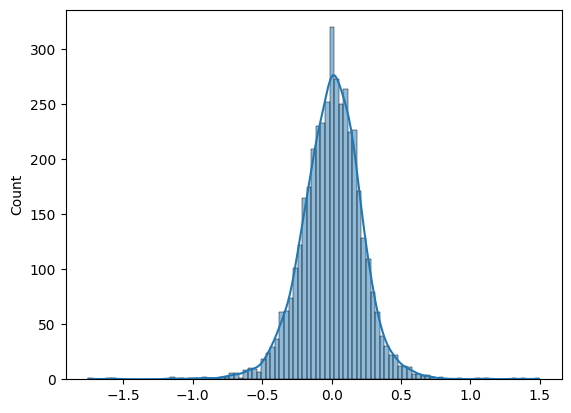

In [205]:
#To see if residual are normally distributed
sns.histplot(residuals,kde=True)

Residuals are almost normally distributed

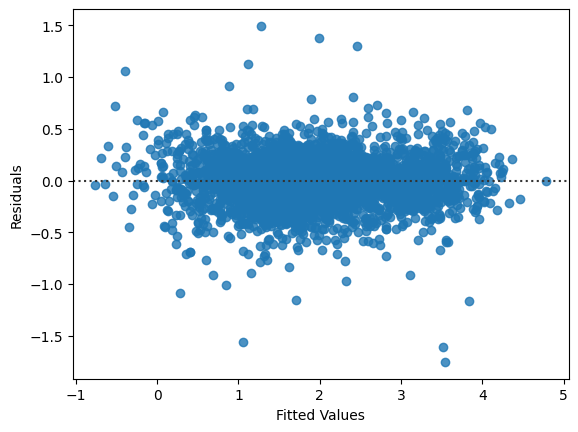

In [206]:
#To check linearity of variables, that is independent variables have a linear relation with target
sns.residplot(x=model4_lin.fittedvalues,y=residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

There is no pattern in the residuals vs fitted values. There for linearity assumption is valid. We can expect homoscedascity as the residuals are almost  evenly distributed around the zero centered horizontal line

In [207]:
#To check heteroscedasticity
#Null hypothesis = Residual are homoscedasticity, residual are symmetrically distributed across the regression line
#Alternative hypothesis- Residual are hetroscedastic
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals,x_train4_lin_sc)
lzip(name, test)

[('F statistic', 1.0160783152903898), ('p-value', 0.35984286720452213)]

p value is greater than 0.05. Thus null hypothesis is valid, that is residuals are symmetrically distributed.


##Ridge Regression

To prevent overfitting we can perform reguralization
Two types of regularization methods are ridge and Lasso regression

In ridge regression we introduce a small amount of bias.
* The bias manifest as sum of squared residuals+alpha * slope^2.

In [208]:
#Ridge regression model

ridge_model = Ridge() #creating Ridge Regression model
ridge_model.fit(x_train_sc, y_train) # Fitting the data into the model
# Checking model perfromance
print("Train data")
print(model_performance_regression(ridge_model,x_train_sc,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(ridge_model,x_test_sc,y_test))

Train data
       RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.218267  0.16391   0.935097        0.934286  7.986814
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.255926  0.182364   0.913837         0.91128  9.533795


The performance metric shows similar results as linear regression. Lets tune the ridge regression parameter alpha using GridSearhCv

In [209]:
#To tune the ridge regression model
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train_sc,y_train)
model_cv.best_params_

{'alpha': 0.001}

In [210]:
ridge_model_tuned = Ridge(alpha=0.001) #creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned.fit(x_train_sc, y_train) # Fitting the data into the tuned model
print("Train data")
print(model_performance_regression(ridge_model_tuned,x_train_sc,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(ridge_model_tuned,x_test_sc,y_test))

Train data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.217656  0.163224    0.93546        0.934654  7.935573
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.255936  0.181726    0.91383        0.911273  9.589089


The model doesn't seem to improve a lot from linear regression

##Lasso regression
In Lasso instead of square of slope in ridge regression, we have absolute value of slope multiplied by alpha

In [211]:
#Lets find optimal alpha value for Lasso regression
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train_sc,y_train)
model_cv.best_params_

{'alpha': 0.001}

In [212]:
#Lasso regression model
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(x_train_sc, y_train)
print("Train data")
print(model_performance_regression(lasso_model,x_train_sc,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(lasso_model,x_test_sc,y_test))

Train data
       RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.226772  0.169623    0.92994        0.929066  8.52282
-------------------------------------------------------------
Test data
       RMSE      MAE  R-squared  Adj. R-squared     MAPE
0  0.254451  0.18084   0.914827          0.9123  8.88273


Lasso regression model doesn't seem to improve the model from linear regression a lot.

##Decision tree

Decision tree will work based on regression classification. Data is split in to small subsets such that information gain is high and entropy is low. Classification is done until the final classes are pure as possible or do not contain mixed class labels.

Here its not necessary to use scaled data, as the algorithm do not rely on the distance between points. Splits are not determined by absolute magnitude rather based on feature threshold (less than a particular value, split to a class, else split to another class).



In [213]:
decision_tree_model= DecisionTreeRegressor(random_state = 1)
#To fit the model
decision_tree_model.fit(x_train, y_train)
print("Train data")
print(model_performance_regression(decision_tree_model,x_train,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(decision_tree_model,x_test,y_test))




Train data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.001889  0.000101   0.999995        0.999995  0.006502
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.281137  0.194067   0.896025         0.89294  11.988888


The decision tree is over fitting, in this case we will need to restrict the number of splits or we will have to perform hyper parameter tuning.
Lets visualize the decision tree. I will use a maximum depth of 3, for propoer visualization and interpretation

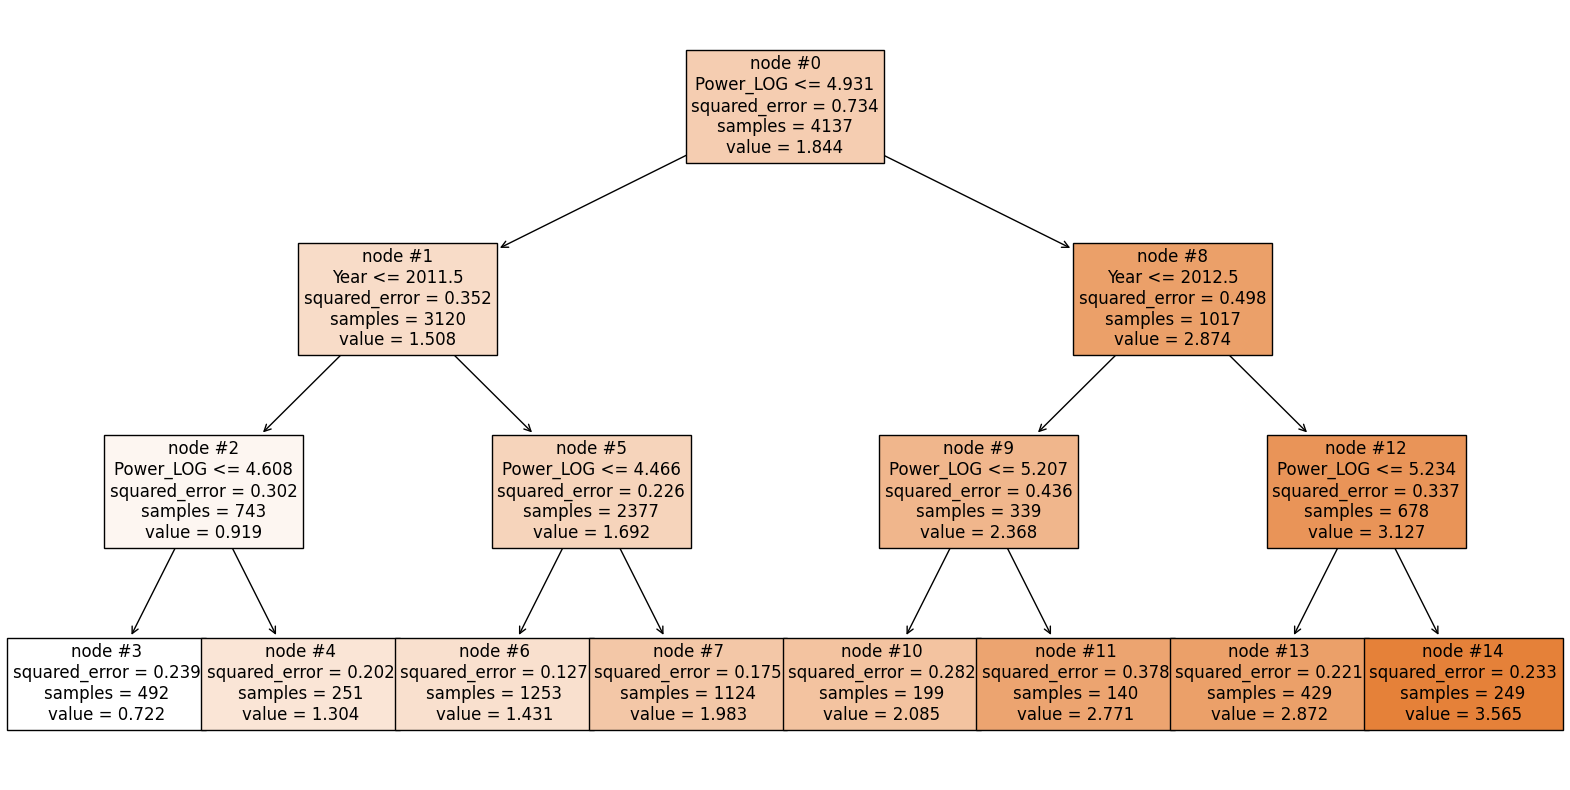

In [214]:
from sklearn import tree
features = list(x.columns)

# Building the model with max_depth=3
dt_regressor_visualize = DecisionTreeRegressor(random_state = 1, max_depth=3)

# Fitting the model
dt_regressor_visualize.fit(x_train, y_train)


plt.figure(figsize = (20, 10))
tree.plot_tree(dt_regressor_visualize, feature_names = features, filled = True, fontsize = 12,
               node_ids = True, class_names = True)
plt.show()

* The first split is at power_log, whichmeans power_log has the highest information gain.

* The internal nodes are Year less than 2011.5 and Year greater than 2011.5.
* If year is less than 2011.5, then power_log is again splitted, less than 4.608 and less than 4.466.
* For year greater than 2011.5, tree splits based on power less than 5.2 and engine less than 1448.
* Here we can interpret the tree as, if power of vehicle is less than 4.9 and year less than 2011 and if power is less than 4.6 the price log range is approximately 0.694.
* If the power is less than 4.9, but year greater than 2011 and power less than 4.46, price is higher compared to cars before 2011. As expected, for year greater than 2011, if power is more than 4.46 price is even higher.

* For power greater than 4.9, for year less than 2012 if engine value is less than 1448.0 the price is less, while if engine value is more the price is high. If year is greater than 2012, again power is used for splitting and if power is less than 5.2 price is lower compared to power greater than 5.2.

* Important thing to note here is that there are vehicle with power greater than 5.2 for manufacturing year greater than 2012.



##Bagging regressor

I wii try bagging regressor, in which decision tree is build for multiple data subsets, which means each data subset will have different model. The test data will be run through each of the model and average of prediction of individual decision tree regressor will be taken

In [215]:
# Here I will use the default number of estimator or decision trees 10
bagging_regressor_model=BaggingRegressor(random_state = 1)
# Fitting the model
bagging_regressor_model.fit(x_train, y_train)

#Perfromance of the model
print("Train data")
print(model_performance_regression(bagging_regressor_model,x_train,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(bagging_regressor_model,x_test,y_test))


Train data
       RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.092399  0.060664   0.988369        0.988224  3.30513
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238689  0.156184   0.925052        0.922828  8.626577


The bagging regressor seem to better fit the test data with MAPE of 8.6% which is the best test fit we have so far. The R square for train is 0.988 and test 0.926. The model could be slightly overfitting.

## Random Forest


Random forest is similar to bagging, except that at each split a random subset of features are considered. In bagging we split the data in to multiple subsets and perform decision tree independently for each subset. Here in each data subset, for each split a random subset of features are only used to split to internal nodes. In the end predictions are made by averaging prediction from each decision tree.

In [216]:
#I am seeting 100 decision tree, each of them will be trained on different data subset
random_forest_model=RandomForestRegressor(n_estimators = 100, random_state = 1)
random_forest_model.fit(x_train,y_train)
#Performance of random forest
print("Train data")
print(model_performance_regression(random_forest_model,x_train,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(random_forest_model,x_test,y_test))


Train data
      RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.08121  0.055223   0.991015        0.990903  3.293608
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.231907  0.150807   0.929251        0.927152  8.210649


The random forest model is slightly overfitting with R Square fo train data as 0.99 and test data 0.93. Now the MAPE for test data is 8%. Random forest model is similar to bagging regressor in terms of model performance. The MAPE is better compared to linear regression which was 9% percent.

There are other regression classification like ADA Boost regressor, Gradient Boosting Regressor and XG boost regressor.  We can see how these algorithm work with price prediction. We will not be tuning the hyperparamteres for these algorithms as they are computationally intensive compared to random forest.Hence we will be mainly focusing on decison tree and random forest.  

## Adaboost regressor
This regressor sequentially train a series of model each focusing on the mistakes of previous models. It combines multiple weak learners to create strong learner. Weak learner prediction is not much better than predicting randomly. It adds weight to training samples and update these weights at each iteration. More weight is assigned to difficult to predict samples.

Model that performs well have higher weight. This regressor can be sensitive to outliers and noisy data, as they try to add weights or fit them during the process

In [217]:
#Model adaboost
adaboost_model=AdaBoostRegressor(random_state=1)
adaboost_model.fit(x_train,y_train)

#To see model performance
print("Train data")
print(model_performance_regression(adaboost_model,x_train,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(adaboost_model,x_test,y_test))

Train data
       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.333639  0.267044    0.84835        0.846457  12.204361
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.348779  0.268306   0.839972        0.835224  12.647147


Using the adaboost model, reduced both the Rsqaure of test and train data to approximately 0.84. Based on R square of test and train data, Ada boost model is not overfitting, but both test and train data are underfitted, as compared to random forest. The MAPE here is more than 12%. This could be because Adaboost is sensitive to noise and outliers in the data.

## Gradient Boosting Regressor
In gradient boosting regressor, instead of adjusting weight of training samples like in Adaboost regressor, it fits weak learner to the residual errors of previous model. This model can also be sensitive to outliers

In [218]:
#Gradient booster model
gradboost_model=GradientBoostingRegressor(random_state=1)
gradboost_model.fit(x_train,y_train)
#Ti check performance of model
print("Train data")
print(model_performance_regression(gradboost_model,x_train,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(gradboost_model,x_test,y_test))

Train data
       RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.199759  0.152234   0.945637        0.944958  7.85123
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.242607  0.168299   0.922571        0.920274  8.279341


The model shows good performace, as the R square and adj R Square of train and test data are 0.94 and 0.92 respectively and the MAPE of test and train data are around 8%.


## XGBoost Regressor
XG boost include lasso and ridge reguralization. This can control overfitting. Overfitting is controlled in gradient boost algorithm by controlling hyperparamters like depth of tree. But in our case gradient boost regressor is not overfitting. We will not tune the hyperparameters.

In [219]:
#XG Boost regressor
xgboost_model=XGBRegressor(random_state=1)
xgboost_model.fit(x_train,y_train)

#Checking model performance
print("Train data")
print(model_performance_regression(xgboost_model,x_train,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(xgboost_model,x_test,y_test))

Train data
       RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.078709  0.05937    0.99156        0.991455  3.442214
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.213807  0.137558   0.939864        0.938079  7.398027


XG boost regressor is slightly overfitting like random forest, but the MAPE is 7.15% for test data.





In [220]:
#Ref Hosptal LOS prediction
models_test_comp_df = pd.concat([model_performance_regression(model4_lin,x_test4_lin_sc,y_test).T,
                                 model_performance_regression(ridge_model_tuned,x_test_sc,y_test).T,
                                 model_performance_regression(lasso_model,x_test_sc,y_test).T,
                                 model_performance_regression(decision_tree_model,x_test,y_test).T,
                                 model_performance_regression(bagging_regressor_model,x_test,y_test).T,
                                 model_performance_regression(random_forest_model,x_test,y_test).T,
                                 model_performance_regression(adaboost_model,x_test,y_test).T,
                                 model_performance_regression(gradboost_model,x_test,y_test).T,
                                 model_performance_regression(xgboost_model,x_test,y_test).T],axis = 1,)

models_test_comp_df.columns = ["Linear regressor",
                               "Ridge regressor",
                               "Lasso regressor",
                               "Decision tree regressor",
                               "Bagging Regressor",
                               "Random Forest regressor",
                               "Ada Boost Regressor",
                               "Gradient Boosting Regressor",
                               "XG Boost Regressor"]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Linear regressor,0.256906,0.181859,0.913175,0.910962,9.271087
Ridge regressor,0.255936,0.181726,0.913830,0.911273,9.589089
Lasso regressor,0.254451,0.180840,0.914827,0.912300,8.882730
Decision tree regressor,0.281137,0.194067,0.896025,0.892940,11.988888
Bagging Regressor,0.238689,0.156184,0.925052,0.922828,8.626577
Random Forest regressor,0.231907,0.150807,0.929251,0.927152,8.210649
Ada Boost Regressor,0.348779,0.268306,0.839972,0.835224,12.647147
Gradient Boosting Regressor,0.242607,0.168299,0.922571,0.920274,8.279341
XG Boost Regressor,0.213807,0.137558,0.939864,0.938079,7.398027


* Based on the test performance, Baggin regressor, random forest and XG boost regressor best fits the test data with lower RMSE and MAPE.

It is imporatant to note slight overfitting is is present for these three regressing models. Bagging regressor, random forest and xg boost regressor train data has an R Square of around 0.98-0.99. The train data shows an MAPE of 2.7%, 2.5% and 3.6% for bagging regressor, random forest and XG Boostrespectively,  when the test data MAPE is around 7%.

The decision tree clearly overfit the data as the train data r square is 0.99 (MAPE 0.006%), when the test data r square is 0.87 (MAPE 12%).

Lets see if we can improve decision tree and random forest performance by hyper parameter tuning. After tuning we will check the feature importance for, tuned random forest, tuned decision tree, gradient boost regressor, XGboost regressor and bagging regressor.

### **Hyperparameter Tuning: Decision Tree**

In [221]:
#For decision tree tuning, I will tune maximum depth, min_samples_split (number of samples a node must have before it split)
#and minimum samples leaf, number of samples required to be at leaf node
#I will not chhose minimum leaf as 1, as this can lead to overfitting, like in the decision tree model without tuning
#Ref LOS Hospital prediction
decision_tree_tuned_model = DecisionTreeRegressor(random_state=1)

# Define the hyperparameters and their potential values
decision_tree_parameters = {
    "max_depth": [5,8,10],
    "min_samples_split": [10,15,20,25],
    "min_samples_leaf": [2,4,6,8]
}

# Run the grid search
decision_tree_grid_obj = GridSearchCV(
    decision_tree_tuned_model, decision_tree_parameters, scoring='neg_mean_squared_error', cv=5
)

decision_tree_grid_obj = decision_tree_grid_obj.fit(x_train, y_train)

# Set the decision_tree_tuned_model to the best combination of parameters
decision_tree_tuned_model = decision_tree_grid_obj.best_estimator_

decision_tree_tuned_model.fit(x_train, y_train)

#Model performance for bets hyperparameter
print("The best hyperparameters are:", decision_tree_grid_obj.best_params_)
print("-------------------------------------------------------------")
print("Train data")
print(model_performance_regression(decision_tree_tuned_model, x_train, y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(decision_tree_tuned_model, x_test, y_test))

The best hyperparameters are: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15}
-------------------------------------------------------------
Train data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.196125  0.145724   0.947597        0.946943  7.684108
-------------------------------------------------------------
Test data
      RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.29071  0.199808   0.888823        0.885524  9.899738


I am not using none as maximum depth, none means tree can have unlimited depth. It stops until all leaves contain some target value. This can result in overfitting.
Here best min_sample_split is 20. Lets see keeping estimator as 10, what happens if we vary min_samples_leaf


In [222]:
#Checking model performance for various min_sample_leaf fixing the max_depth 10
min_leaf=[2,4,6]
for min in min_leaf:
  decision_tree_tuned_model=DecisionTreeRegressor(min_samples_leaf=min,max_depth=10,min_samples_split=20,random_state = 1)
  decision_tree_tuned_model.fit(x_train,y_train)
  print("Train data for min_samples_leaf",min)
  print(model_performance_regression(decision_tree_tuned_model,x_train,y_train))
  print("-------------------------------------------------------------")
  print("Test data for min_samples_leaf",min)
  print(model_performance_regression(decision_tree_tuned_model,x_test,y_test))
  print("*******************************************************************")

Train data for min_samples_leaf 2
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.203068  0.150943   0.943821         0.94312  8.031937
-------------------------------------------------------------
Test data for min_samples_leaf 2
       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.295692  0.202156    0.88498        0.881567  10.108574
*******************************************************************
Train data for min_samples_leaf 4
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.210088  0.155113    0.93987        0.939119  7.839099
-------------------------------------------------------------
Test data for min_samples_leaf 4
       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.301927  0.207163   0.880078         0.87652  10.388401
*******************************************************************
Train data for min_samples_leaf 6
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.219814  0.160911   0.934174     

With increasing min_leaf both test_data and train_data performance is reducing. Lets keep min_leaf to be 4. Increasing min_leaf reduce model complexity. Now lets vary max_depth

In [223]:
#Checking model performance for various max_depth 10 fixing min_leaf as 2
max_depth=[10,15,20]
for max in max_depth:
  decision_tree_tuned_model=DecisionTreeRegressor(min_samples_leaf=2,max_depth=max,min_samples_split=20,random_state = 1)
  decision_tree_tuned_model.fit(x_train,y_train)
  print("Train data for max_depth",max)
  print(model_performance_regression(decision_tree_tuned_model,x_train,y_train))
  print("-------------------------------------------------------------")
  print("Test data for max_depth",max)
  print(model_performance_regression(decision_tree_tuned_model,x_test,y_test))
  print("*******************************************************************")

Train data for max_depth 10
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.203068  0.150943   0.943821         0.94312  8.031937
-------------------------------------------------------------
Test data for max_depth 10
       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.295692  0.202156    0.88498        0.881567  10.108574
*******************************************************************
Train data for max_depth 15
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.177628  0.127899   0.957015        0.956479  7.545265
-------------------------------------------------------------
Test data for max_depth 15
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.290707  0.195673   0.888826        0.885527  9.108332
*******************************************************************
Train data for max_depth 20
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.174868  0.125212   0.958341        0.957821  7.359248
----------

Here we can see as we increase max_depth, R square of train data change from 0.94 to 0.956 from 10 to 20, but R square of test data  approximately remain at 0.88, and if we recall from decision tree without tuning, when maximum depth was allowed to be unlimited the r square of test data was 0.87. This is an indication that increasing depth is increasing model complexity and thus leading to overfitting. Hence as tuned max depth, I will fix max_depth to be 10.

In [224]:
#Final decision tree model
decision_tree_tuned_final_model=DecisionTreeRegressor(max_depth=10,min_samples_leaf=4,min_samples_split=20,random_state = 1)
decision_tree_tuned_final_model.fit(x_train,y_train)
print("Train data")
print(model_performance_regression(decision_tree_tuned_final_model,x_train,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(decision_tree_tuned_final_model,x_test,y_test))


Train data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.210088  0.155113    0.93987        0.939119  7.839099
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.301927  0.207163   0.880078         0.87652  10.388401


**Feature Importance**

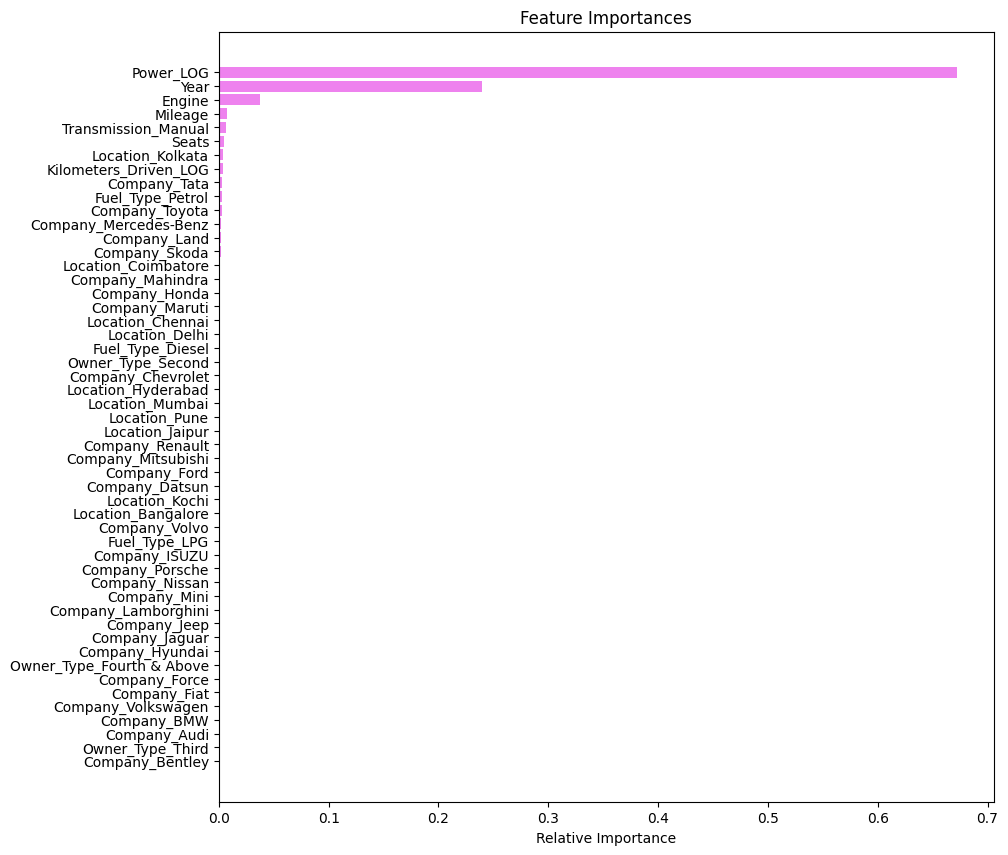

In [225]:
# Hospital LOS model
#Plotting the feature importance
features = list(x.columns)

importances = decision_tree_tuned_final_model.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

The most important feature determining the price of used car according to decision tree model is power, year, engine, mileage and transmission manual.
With increase in power and engine capacity price increases, old cars have lower price, lower mileage has higher price, this is again due to the power and engine factor, more manual cars are available and they have lesser price compared to automatic.

### **Hyperparameter Tuning: Random Forest**

In [226]:
#Hyperparameters tp tune in random forest are no of estimators, maximum depth, max_features, the max leaf nodes in a tree
#I will focus on maximum depth and maximum features no of estimators
#In a default random forest regressor the maximum depth is none.
#I will not use none while hyperparameter tuning as it increase model complexity leading to overfitting
random_forest_tuned_model=RandomForestRegressor(random_state = 1)
random_forest_parameters = {"n_estimators": [100, 110, 120],

    "max_depth": [5, 7, 10],

    "max_features": [0.4,0.5,0.8]
             }

# Run the grid search
random_forest_grid_obj = GridSearchCV(random_forest_tuned_model, random_forest_parameters, scoring = 'neg_mean_squared_error', cv = 5)

random_forest_grid_obj = random_forest_grid_obj.fit(x_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
random_forest_tuned_model = random_forest_grid_obj.best_estimator_

#Model performance

random_forest_tuned_model.fit(x_train, y_train)
print("The best estimators are", random_forest_grid_obj.best_params_)
print("-------------------------------------------------------------")
print("Train data")
print(model_performance_regression(random_forest_tuned_model,x_train,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(random_forest_tuned_model,x_test,y_test))


The best estimators are {'max_depth': 10, 'max_features': 0.5, 'n_estimators': 110}
-------------------------------------------------------------
Train data
       RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.150696  0.11868   0.969062        0.968675  6.721748
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.237052  0.165096   0.926077        0.923883  7.996358


I am not using none as maximum depth, means tree can have unlimited depth. It stops until all leaves contain some target value. This can result in overfitting.
Here best number of estimators are 110, and max_features 50% of the feature. The max_depth is 10, which is the maximum value in the set I gave.

Lets see keeping n_estimator 10, max_features 0.5, if we keep increasing max_depth what would happen. Right now R_Square for training is 0.968 and for test 0.922

In [227]:
#To see how different max_depth for fixed estimator and max_feature affect the model performance
max_depth=[10,15,20]
for max in max_depth:
  random_forest_tuned_model=RandomForestRegressor(max_depth=max,n_estimators=110,max_features=0.5,random_state = 1)
  random_forest_tuned_model.fit(x_train,y_train)
  #Model performance
  print("Train data for max depth",max)
  print(model_performance_regression(random_forest_tuned_model,x_train,y_train))
  print("-------------------------------------------------------------")
  print("Test data for max_depth",max)
  print(model_performance_regression(random_forest_tuned_model,x_test,y_test))
  print("*******************************************************************")


Train data for max depth 10
       RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.150696  0.11868   0.969062        0.968675  6.721748
-------------------------------------------------------------
Test data for max_depth 10
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.237052  0.165096   0.926077        0.923883  7.996358
*******************************************************************
Train data for max depth 15
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.092089  0.068951   0.988447        0.988303  3.871287
-------------------------------------------------------------
Test data for max_depth 15
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.224966  0.149286   0.933422        0.931447  7.216185
*******************************************************************
Train data for max depth 20
      RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.07794  0.055385   0.991724        0.991621  3.089393
----------------

Here we can see as we increase max_depth from 10 to 20, R square of train data change from 0.96 to 0.99, but R square of test data  change from 0.92 to 0.93, and if we recall from random forest without tuning, when maximum depth was allowed to be unlimited the r square of test data was 0.92. This is an indication that increasing depth is increasing model complexity and thus leading to overfitting. Hence as tuned max depth, I will fix max_depth to be 10.

In [228]:
#Final random forest model
random_forest_tuned_final_model=RandomForestRegressor(max_depth=10,n_estimators=110,max_features=0.5,random_state = 1)
random_forest_tuned_final_model.fit(x_train,y_train)
#Model performance
print("Train data")
print(model_performance_regression(random_forest_tuned_final_model,x_train,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(random_forest_tuned_final_model,x_test,y_test))



Train data
       RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.150696  0.11868   0.969062        0.968675  6.721748
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.237052  0.165096   0.926077        0.923883  7.996358


The tuned random forest model is less overfitting compared to the not tuned one.
Before tuning the MAPE for train data was 2.5%, now its 6.5% comparable to the test data.

**Feature Importance**

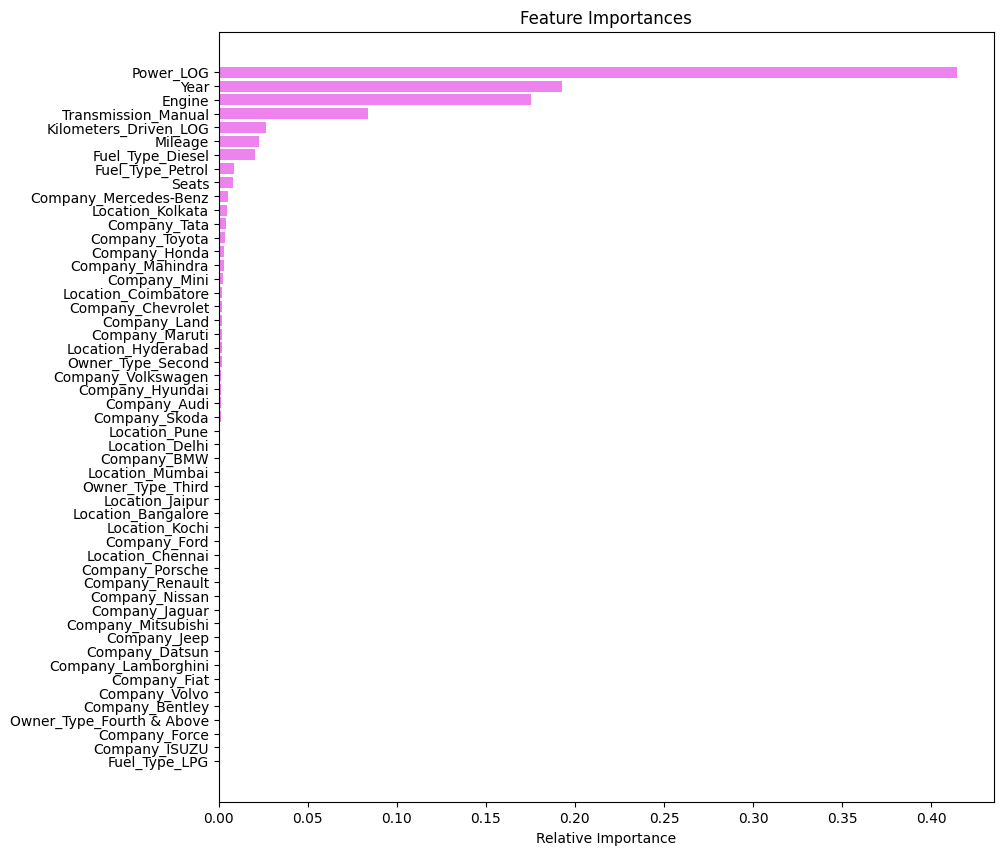

In [229]:
# Plotting the feature importance
features = list(x.columns)

importances = random_forest_tuned_final_model.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

The most important feature determining the price of used car according to tuned random  forest model is power, year, engine, transmission manual, kilometers driven, mileage, fuel type, and seats. If we look further some car companies also contiribute.

Mercedes Benz are expensive cars, comapred honda, hyundai, toyota and tata.

Location Kolkata also seem to have some effect, it has lower majority car prices compared to other locations

In [230]:
#Ref Hosptal LOS prediction
#To compare model performances
models_test_comp_df = pd.concat([model_performance_regression(model4_lin,x_test4_lin_sc,y_test).T,
                                 model_performance_regression(ridge_model_tuned,x_test_sc,y_test).T,
                                 model_performance_regression(lasso_model,x_test_sc,y_test).T,
                                 model_performance_regression(decision_tree_tuned_final_model,x_test,y_test).T,
                                 model_performance_regression(bagging_regressor_model,x_test,y_test).T,
                                 model_performance_regression(random_forest_tuned_final_model,x_test,y_test).T,
                                 model_performance_regression(adaboost_model,x_test,y_test).T,
                                 model_performance_regression(gradboost_model,x_test,y_test).T,
                                 model_performance_regression(xgboost_model,x_test,y_test).T],axis = 1,)

models_test_comp_df.columns = ["Linear regressor",
                               "Ridge regressor",
                               "Lasso regressor",
                               "Decision tree tuned regressor",
                               "Bagging Regressor",
                               "Random Forest tuned regressor",
                               "Ada Boost Regressor",
                               "Gradient Boosting Regressor",
                               "XG Boost Regressor"]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Linear regressor,0.256906,0.181859,0.913175,0.910962,9.271087
Ridge regressor,0.255936,0.181726,0.913830,0.911273,9.589089
Lasso regressor,0.254451,0.180840,0.914827,0.912300,8.882730
Decision tree tuned regressor,0.301927,0.207163,0.880078,0.876520,10.388401
Bagging Regressor,0.238689,0.156184,0.925052,0.922828,8.626577
Random Forest tuned regressor,0.237052,0.165096,0.926077,0.923883,7.996358
Ada Boost Regressor,0.348779,0.268306,0.839972,0.835224,12.647147
Gradient Boosting Regressor,0.242607,0.168299,0.922571,0.920274,8.279341
XG Boost Regressor,0.213807,0.137558,0.939864,0.938079,7.398027


* The best test data performance is from XG Boost regressor, then tuned random forest regressor, gradient boost regressor and bagging regressor.
* Our linear regressor model fits better compared to AdaBoost and decision tree regressor after tuning.
* The tuned decision tree was still slightly overfitting and AdaBoost regressor was underfitting.


 We need to see which model best minimizes overfitting among this. Lets check the model performance of the best two model and linear regressor model in train data.

In [232]:
models_train_comp_df = pd.concat([model_performance_regression(random_forest_tuned_final_model,x_train,y_train).T,
                                 model_performance_regression(model4_lin,x_train4_lin_sc,y_train).T,
                                 model_performance_regression(xgboost_model,x_train,y_train).T],axis = 1,)

models_train_comp_df.columns = ["Random Forest tuned regressor","Linear Regressor","XG Boost Regressor"]

print("Train performance comparison:")

models_train_comp_df.T

Train performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Random Forest tuned regressor,0.150696,0.118680,0.969062,0.968675,6.721748
Linear Regressor,0.221992,0.165394,0.932863,0.932141,7.774633
XG Boost Regressor,0.078709,0.059370,0.991560,0.991455,3.442214


* Comparing with test data performance, XGBoost regressor (we are not performing hyperparameter tuning for this model) is slightly overfitting with MAPE of train data around 2-3%. Their test data MAPE is more than 7%.
XGBoost have the least RMSE.

* In XGBoost, gradient boost, and adaboost the base learner is often a decision tree, but these trees are usually more complex than those used in Random Forest. This can increase the overall complexity of the model.

* XGBoost has more hyperparameters compared to random forest. Hence random forest is less sensitive to the choice of hyperparameters compared to XGBoost.

* Linear regressor has MAPE for train and test data 7.77% and 9.27% respectively. Random forest tuned model has MAPE for train and test data 6.7% and 7.99% respectively.

* The tuned random forest model is the best fit considering less overfitting, best test data performance, and a less complex model."

## **Conclusions and Recommendations**

### **Executive Summary**
We were trying to understand the important factors effecting the used cars price to give recommendations to a company called Cars4U. To understand the problem, we performed exploratory data analysis and build machine learning models like regression  (linear, lasso and ridge), decision tree, random forest and other advanced regression classification models like XG Boost, Gradient boost and AdaBoost.

**Major findings and key takeaways**
* There were missing values in the feature columns Seat, New Price, Power, Engine and the target variable used car price.
* The rows of missing values were removed for Engine, as the missing value percent was around 0.4%. Seat missing values were imputed using the mode value 5 seats, and performing this step didn't change the price distribution for 5 seated vehicle. The missing power values were imputed randomly based on the current power distribution. We saw after random imputation the power distribution didn't change. This was important as we are just imputing for 1.7% missing values.
* There were 74% missing values in new price and it was found that the best way to deal with this missing value is completely remove that column.  When car become old, its price reduces from its new car price, based on factors like year, kilometer driven, mileage, power, and engine. Hence whatever the intial price is, reduction in price is based on the car performance. More than the absolute value of new_car price, how much the car price reduced is important. Therefore from bivariate analysis, the knowledge of new-car price didn't give us additional information about trend in used car price.
* It is important to note that there were zero mileage values, which is unrealistic for a data set with minimum kilometer driven 174 km. Those zero mileage values were treated as missing values and removed.
* The maximum kilomter driven for a vehicle was 6500000 km, which is unrealistic for a vehicle manufactured in 2017. This value was one of the main reason for the highly skewed kilometer driven feature distribution. Once this value was removed the remaining skeweness was resolved by log transforming. The next maximum was 775000 km. This is still high for a passenger car manufactured at 2013. But if this car was used as a taxi or delivery vehicle may be this is possible.
* There are only two data points for car fuel type electric car. There are not enough data points to make interpretation for that category. Even if we see any trend for those two data points compared to petrol and diesel, we cannot eliminate the fact that it can come from an error.
* Based on EDA (heat map, correlation plots), the expected important features determing the target variable used car price was power, engine, year, manual/transmission, some car companies, and mileage, and the same was concluded from our regression and tree models.
* The power, kilometrs drive and price was log transformed as they were skewed.
* We used linear regression, lasso regression, ridge regression, decision tree (hyperparameter tuned), random forest (hyperparameter tuned), AdaBoost regression, Gradient boost regression and XGBoost regression for our analysis.
* **Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
  * We use metric like RMSE, MAPE, Rsquare and adj R square to compare the models
  * Based on these metric the best model is tuned random forest considering overfit, test data performance, lower RMSE, and higher R Square.
  * XGBoost, shows test data performance with approximately 7% MAPE better compared to random forest model approximately 8% MAPE, but its important to note that it is overfitting
  * Models like AdaBoost, XGBoost, and Gradient boost are sensitive to hyperparameter choices, which are more in number compared to random forest.
  * These are more complex models
  * Linear regressor is not overfitting based on checking the train data and test data metric.
  * The MAPE for linear regressor is higher compared to random forest model, but lower compared to decision tree.
  * The decision tree was overfitting with higher R Square for train data but lower for test data. This didn't change much after tuning. Random forest uses bootstrapping thus reducing overfitting.
  * We can try hyperparamter tuning for more complex models like AdaBoost, XGBoost and gradient boost
  * We should note that simpler models are better for interpretibility.
  * Our linear regression model metric imply, that our missing value treatment, multicollinearity treatment, removing unreasonable data points and outliers were in the right direction.
  * Lasso regression and ridge regression metric were similar to linear regression metric.
  * The first 5 important features in these models are common, and they are Power, year, Engine, transmission manual and kilometers driven

**Key next steps**
* Though simpler models are better for interpretibility, we could try hyperparameter tuning for more complex models like XGBoost, AdaBoost and gradient boost models.
* These models are sensitive to hyperparameter choices, which are more in number compared to random forest.
* If we obtain an optimal hyperparameter choices for these model, it could improve the model performance.
* These models can be more sensitve to outliers compared to random forest as they try to fit the errors in training data. Random Forest is less sensitive to outliers and noisy data due to the averaging effect of multiple trees. Hence we can use these models, after dealing with the outliers in the kilomters driven, power if possible  in a better manner. May be we can remove some of the outliers in kilometers driven.
* We need more data points for new price, to see if it has any effect.
* We need more realisitic data points for kilometer driven and non zero mileage values for the current obtained zero values, to have better interpretibility thus improving the model performance.

**Final proposed model specification and refined insights**

* The final proposed model is tuned random forest model
* After hyperparamter tuning the found optimal maximum depth was 10, with 110 number of estimators, and maximum features 50%  (0.5).
* The performance metric is
  * Train data
       * RMSE---------------0.151         
       * MAE----------------0.118    
       * R-squared----------0.969
       * Adj. R-squared-----0.968     
       * MAPE---------------6.72
  * Test data
       * RMSE---------------0.237         
       * MAE----------------0.165    
       * R-squared----------0.926
       * Adj. R-squared-----0.923     
       * MAPE---------------7.99
* The model is not overfitting a lot, with MAPE of 6.7% for train data and 7.99% for test data.
* The most important features for random forest regressor are, Power, year, Engine, transmission manual, kilometers driven, mileage, fuel type, and seats in order. If we look further some car companies also contiribute.
* Mercedes Benz are expensive cars, comapared to honda, hyundai, toyota and tata.
* Location Kolkata also seem to have some effect, it has lower majority car prices compared to other locations.





### **Problem, Solution Summary  & Proposal for the final solution design**
* Recently, we have seen an increased demand for used cars due to inflation and a change in perspective where cars have become a necessity rather than a luxury. Inflation resulted in people struggling with high interest rates seeking relief in the used car industry. Before the emergence of COVID-19, in 2018-2019, when new car sales were recorded at 3.6 million, a 4 million sale was recorded for used cars. Since used cars are sold through dealerships, there is a large uncertainty in how prices are decided. Predicting used car prices is important for both buyers and sellers. Buyers can use models to make informed decisions about the worth of a car they are interested in, and sellers can set competitive prices for vehicles. The model, mileage, the year (higher demand or not, can supply meet the demand) and several other factors determine the worth of a car. Understanding the important features affecting used car price can provide insights for dealers and the vehicle industry as a whole, and thus making it more deterministic and reducing the uncertainty is important to grow in the market. Cars4U is thus a tech company interested in understanding the footholds in the market. As a data scientist, my aim was to build a model that predicts the used car price with less uncertainty.

* The proposed solution, based on trying different models, was a hyperparameter-tuned random forest model to describe the data. The question is why this particular model. Based on the provided data, after performing data preprocessing, this was the model that performed well in the test data considering overfitting. Since in a random forest we are averaging for different trees built for different data subsets, the model is less sensitive to outliers which were prevalent in the data. The simplest model, linear regression, had low test data performance, hence might not be a good model to describe a new data set. We can ignore multicollinearity effects in the random forest model. Models like XGBoost, AdaBoost, and gradient boost have more hyperparameters to tune and are more sensitive to outliers compared to random forest.

* Based on the feature importance from random forest, the important features were power, year, engine, transmission manual, kilometers driven, mileage, fuel type, and seats in order. If we look further, some car companies also contribute. With an increase in power and engine, the price increases. Higher engine capacity vehicles will have higher power. Mileage decreases with an increase in power, thus higher price. The price is negatively correlated with the year. Old cars are more driven and require repeated maintenance due to less efficient components. In India, there is more availability of manual cars, and probably the reason why transmission mode is an important factor in determining the price. Generally, manual cars are less priced than automatic. Hence people prefer manual cars, although there is a gradual increased demand for automatic cars these days. The most available cars run on fuel types diesel and petrol, and their price is in general less compared to CNG and LPG vehicles. This could be because these gas types are more common and easily available in the country. Most cars are 5-seated, which could be why seat is important in determining the used car price. Location Kolkata also seems to have some effect; it has lower majority car prices compared to other locations. Similarly, some car companies have influence on the price. Mercedes Benz cars are expensive, compared to Honda, Maruti, Hyundai, Toyota, and Tata, which are more commonly available. Location Kolkata has the lowest median price compared to other locations, suggesting cars there tend to be less expensive.

* For minimum profit, it will be more advisable to include vehicles of popular demand. Thus dealers can have more manual used cars, running on petrol and diesel, of commonly used brands like Honda, Maruti, and Hyundai. The companies like Mercedes Benz have pricey vehicles, whose price might not change a lot from its new car price, and people might prefer new cars for those companies. Thus the used car price is high.

* Buyers can get cheaper used car options in location Kolkata. A buyer looking for the cheapest option can go for the most available used car type, a 5-seated petrol running manual car of companies Maruti, Honda, Hyundai, or Toyota.

* Sellers can be more competitive by including more automatic cars. Including many luxurious brand cars might not be profitable, but including more cars running on CNG, electric, and automatic cars can increase the diversity of cars available with the dealer, and there is a gradual increase in demand for these cars.

* The model is likely to solve the used car price prediction in India, as the model doesn't overfit, it describes both test data and train data well, and the MAPE of test data is around 7.7%. The data had more than 7000 data points, and it properly covers the popular demand and availability in the country. The data also had some outliers. The model was successful in predicting the used car price considering the general trend and outliers.


## **Recommendations for Implementation**

#### **Key recommendations to implement solutions**
* Need to make sure that data quality is maintained, with non-zero values for mileage, and realistic values for kilometers driven.
* If there are missing data points, random imputations, or mode value imputations can be done, given it doesn't affect the price distribution much. KNN imputation is not recommended if the data has many outliers like the current data provided.
* Appropriately transform or remove outliers to improve the overall model performance.
* Try more rigorous hyperparameter tuning for complex models like AdaBoost, XGBoost, and Gradient boost. As the model becomes complex, sometimes interpretability can be difficult.
* To have a wider database, more data on cars running on electric, CNG, and automatic can be included.
* Used cars price in India can be predicted with less uncertainty if we have details about Power, Engine, Mileage, Kilometers driven, fuel type, seat, and transmission available.

#### **Key Actionables for Stakeholders and Expected Benefits/Costs**

* For Cars4U, the random forest model can be a reasonable model for predicting car prices with less uncertainty. Cars4U can suggest companies to have more manual used cars with a balance of more power and more mileage so profit can be increased at the same time meeting demand for high mileage less priced vehicles.
* Very old cars, older than 2005, need not be sold as used cars as they have less demand and are non-profitable.
* Sellers can diversify the inventory by including more cars running on CNG, LPG, and electric, but also by maintaining the highest available numbers for petrol and diesel thus catering to popular needs. In this case, the dealers will become competitive where they will have to spend more money, but at the same time receiving minimum profit.
* Dealers can set aside costs for performing the recommended solutions above to get good quality (imputation, outlier handling, reasonable data points) and diverse datasets. This would benefit the dealers to decide prices more accurately and thus be more reasonable with the buyers. This would make the dealer more trustable with the quality and price. The buyers shouldn't feel that the car price is uncertain and it's based on dealer perspective alone.
* Buyers can use the model to gain insights into the worth of a used car so that they do not get cheated paying higher prices for a car that is of low performance.

####**Key Risks and Challenges**

* The new price data had 70% missing values, because of which we had to remove the whole column. The available data, whether present or not, didn't give any new information. Thus we do not know whether in reality new price has an influence on used cars. We can expect rather than absolute value, it is how much the car price reduced based on year, power, mileage, kilometers driven, manual/automatic, fuel type matters. But this is a hypothesis, we need enough data points for new price to confirm this.
* Many mileage values were zero; this might pose difficulty in accuracy of predictions. Though only one outlier value for kilometer driven was removed, with the number of outliers in that feature, there could have been even more error values. The next maximum after removing the highest outlier value was not reasonable for a passenger vehicle, if otherwise not used as a taxi or delivery vehicle. But we do not know this for sure, for what purpose the car was used or if it was an error. This could again cause some difficulties to the accuracy of models.
* It is a challenge to find a balance between model complexity and interpretability. Simple models are always helpful in interpretability. But as we saw in the above data set, simpler models like linear regression are not the best models.


#### **Further analysis and associated problems**

* We do not have information on previous accidents or service records of a car, which can also influence the used car price. We need to perform analysis considering these factors.
* We need to perform analysis for data covering different time periods and see if we need to include other features like fuel price and economic conditions in predicting the car price. In this case we can be certain about how price changes in real time.
* Modelling for real-time data can be sometimes difficult. For example, in the current data, we are considering a time period 2018-2019. Extreme variations can be expected in the market when issues like COVID-19 or war emerge. Recent semiconductor chip shortages have resulted in increased prices for new cars and slower delivery. This increased the demand for used cars, resulting in a situation of supply cannot meet demand, thus increasing the used car price as well.
* During this inflation period, since the new car prices are high, there is a chance of uncertainty in predicting the used car price even once the situation is back to normal. Here new price data is important, to see how this feature affects the used car price.
* The model might not be applicable for car companies in a different country, as the car companies prominent there can be different, many countries have more automatic cars, some countries have more electric cars these days. This model might be only applicable in India. For more generalization we need more data points from other countries as well.
